In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import eli5
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import math
import random
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

In [7]:
df = pd.read_csv('../6/weatherAUS.csv')

In [3]:
print(df.info())
print(df.describe())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ...        22.0   
1            NaN         WNW           44.0        NNW  ...        25.0   
2            NaN         WSW           46.0          W  ...        30.0   
3            NaN          NE           24.0         SE  ...        16.0   
4            NaN           W           41.0        ENE  ...        33.0   
...          ...         ...            ...        ...  ...         ...   
142188       NaN           E           31.0        ESE  ...        27.0   
142189       NaN           E           31.0         SE  ...        24.0   
142190       NaN         NNW           22.0         SE  ...        21.0   
142191       NaN           N           37.0         SE  ...        24.0   
142192       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
142188       1024.7       1021.2       NaN       NaN      9.4     20.9   
142189       1024.6       1020.3       NaN       NaN     10.1     22.4   
142190       1023.5       1019.1       NaN       NaN     10.9     24.5   
142191       1021.0       1016.8       NaN       NaN     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RISK_MM  RainTomorrow  
0              No      0.0            No  
1              No      0.0            No  
2              No      0.0            No  
3              No      1.0            No  
4              No      0.2            No  
...           ...      ...           ...  
142188         No      0.0            No  
142189         No      0.0            No  
142190         No      0.0            No  
142191         No      0.0            No  
142192         No      0.0            No  

[142193 rows x 24 columns]

In [8]:
print(df.isna().sum())

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


In [9]:
df = df.drop(columns=['Location','WindGustDir','WindDir9am','WindDir3pm'])
x = df.dropna()

In [6]:
x = x.drop(columns=['RainToday','RainTomorrow','Date'])

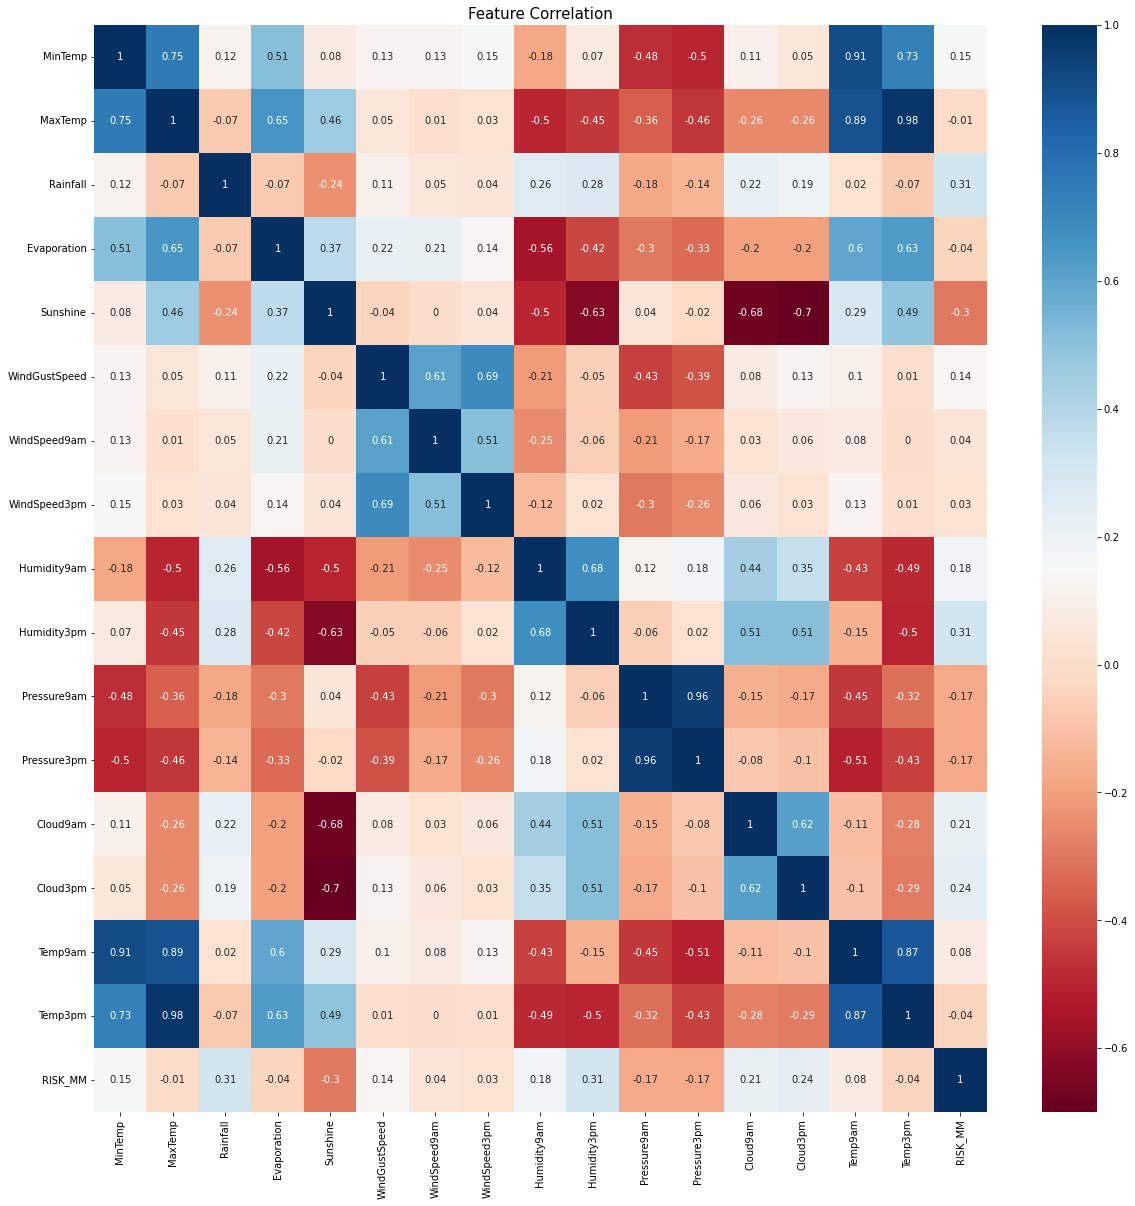

In [7]:
# Create a correlation heatmap using matplotlib and seaborn
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(x.corr().round(2), annot=True, cmap='RdBu')
highlight_color = 'blue'
ax.add_patch(Rectangle((0, 20), 21, 1, fill=False, edgecolor=highlight_color, lw=3))
ax.add_patch(Rectangle((20, 0), 1, 21, fill=False, edgecolor=highlight_color, lw=3))
plt.title("Feature Correlation", fontsize=15)
plt.show()

[Text(0.5, 0, 'Rainfall')]

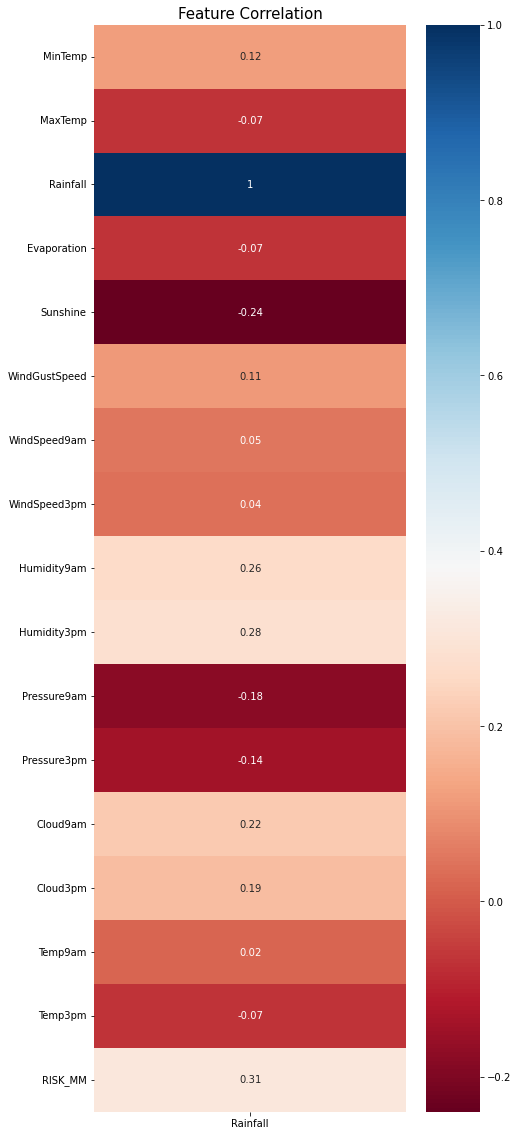

In [8]:
fig, ax = plt.subplots(figsize=(7, 20))
sns.heatmap(x.corr().iloc[:,2].values.reshape(-1, 1).round(2), annot=True, cmap='RdBu')
plt.title("Feature Correlation", fontsize=15)
ax.set_yticklabels(x.columns.tolist(), rotation=0)
ax.set_xticklabels(['Rainfall'])

In [9]:
a = df.dropna()
z = a['RainToday']
y_train = a['Rainfall']
X_train = a.drop(columns=['Rainfall','Date','RainToday','RainTomorrow'])


In [10]:
X_train

MinTemp  MaxTemp  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
5939       17.9     35.2         12.0      12.3           48.0           6.0   
5940       18.4     28.9         14.8      13.0           37.0          19.0   
5942       19.4     37.6         10.8      10.6           46.0          30.0   
5943       21.9     38.4         11.4      12.2           31.0           6.0   
5944       24.2     41.0         11.2       8.4           35.0          17.0   
...         ...      ...          ...       ...            ...           ...   
139108     19.3     33.4          6.0      11.0           35.0           9.0   
139109     21.2     32.6          7.6       8.6           37.0          13.0   
139110     20.7     32.8          5.6      11.0           33.0          17.0   
139111     19.5     31.8          6.2      10.6           26.0           9.0   
139112     20.2     31.7          5.6      10.7           30.0          15.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
5939            20.0         20.0         13.0       1006.3       1004.4   
5940            19.0         30.0          8.0       1012.9       1012.1   
5942            15.0         42.0         22.0       1012.3       1009.2   
5943             6.0         37.0         22.0       1012.7       1009.1   
5944            13.0         19.0         15.0       1010.7       1007.4   
...              ...          ...          ...          ...          ...   
139108          20.0         63.0         32.0       1013.9       1010.5   
139109          11.0         56.0         28.0       1014.6       1011.2   
139110          11.0         46.0         23.0       1015.3       1011.8   
139111          17.0         62.0         58.0       1014.9       1010.7   
139112           7.0         73.0         32.0       1013.9       1009.7   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RISK_MM  
5939         2.0       5.0     26.6     33.4      0.0  
5940         1.0       1.0     20.3     27.0      0.0  
5942         1.0       6.0     28.7     34.9      0.0  
5943         1.0       5.0     29.1     35.6      0.0  
5944         1.0       6.0     33.6     37.6      0.0  
...          ...       ...      ...      ...      ...  
139108       0.0       1.0     24.5     32.3      0.0  
139109       7.0       0.0     24.8     32.0      0.0  
139110       0.0       0.0     24.8     32.1      0.0  
139111       1.0       1.0     24.8     29.2      0.0  
139112       6.0       5.0     25.4     31.0      0.0  

[58090 rows x 16 columns]

In [11]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification

# rf = RandomForestClassifier(random_state=42)
# rf.fit(X_train, z)

# # Create a dataframe for the model's feature importance
# feat_df = pd.DataFrame(
#     rf.feature_importances_, columns=['feature importance'], 
#     index=X_train.columns).sort_values(
#     'feature importance', ascending=False)

# # Print the 5 highest features in terms of importance
# print(feat_df.head())

             feature importance
Humidity9am            0.134364
RISK_MM                0.085837
Humidity3pm            0.081447
MinTemp                0.076029
Pressure9am            0.074399


In [12]:
# import eli5
# from eli5.sklearn import PermutationImportance

# # Create a permutation importance plot
# perm_imp = PermutationImportance(rf, random_state=42).fit(X_train, z)
# eli5.show_weights(perm_imp, feature_names=X_train.columns.tolist())

Mean:  5.469824216349123  Median:  4.8


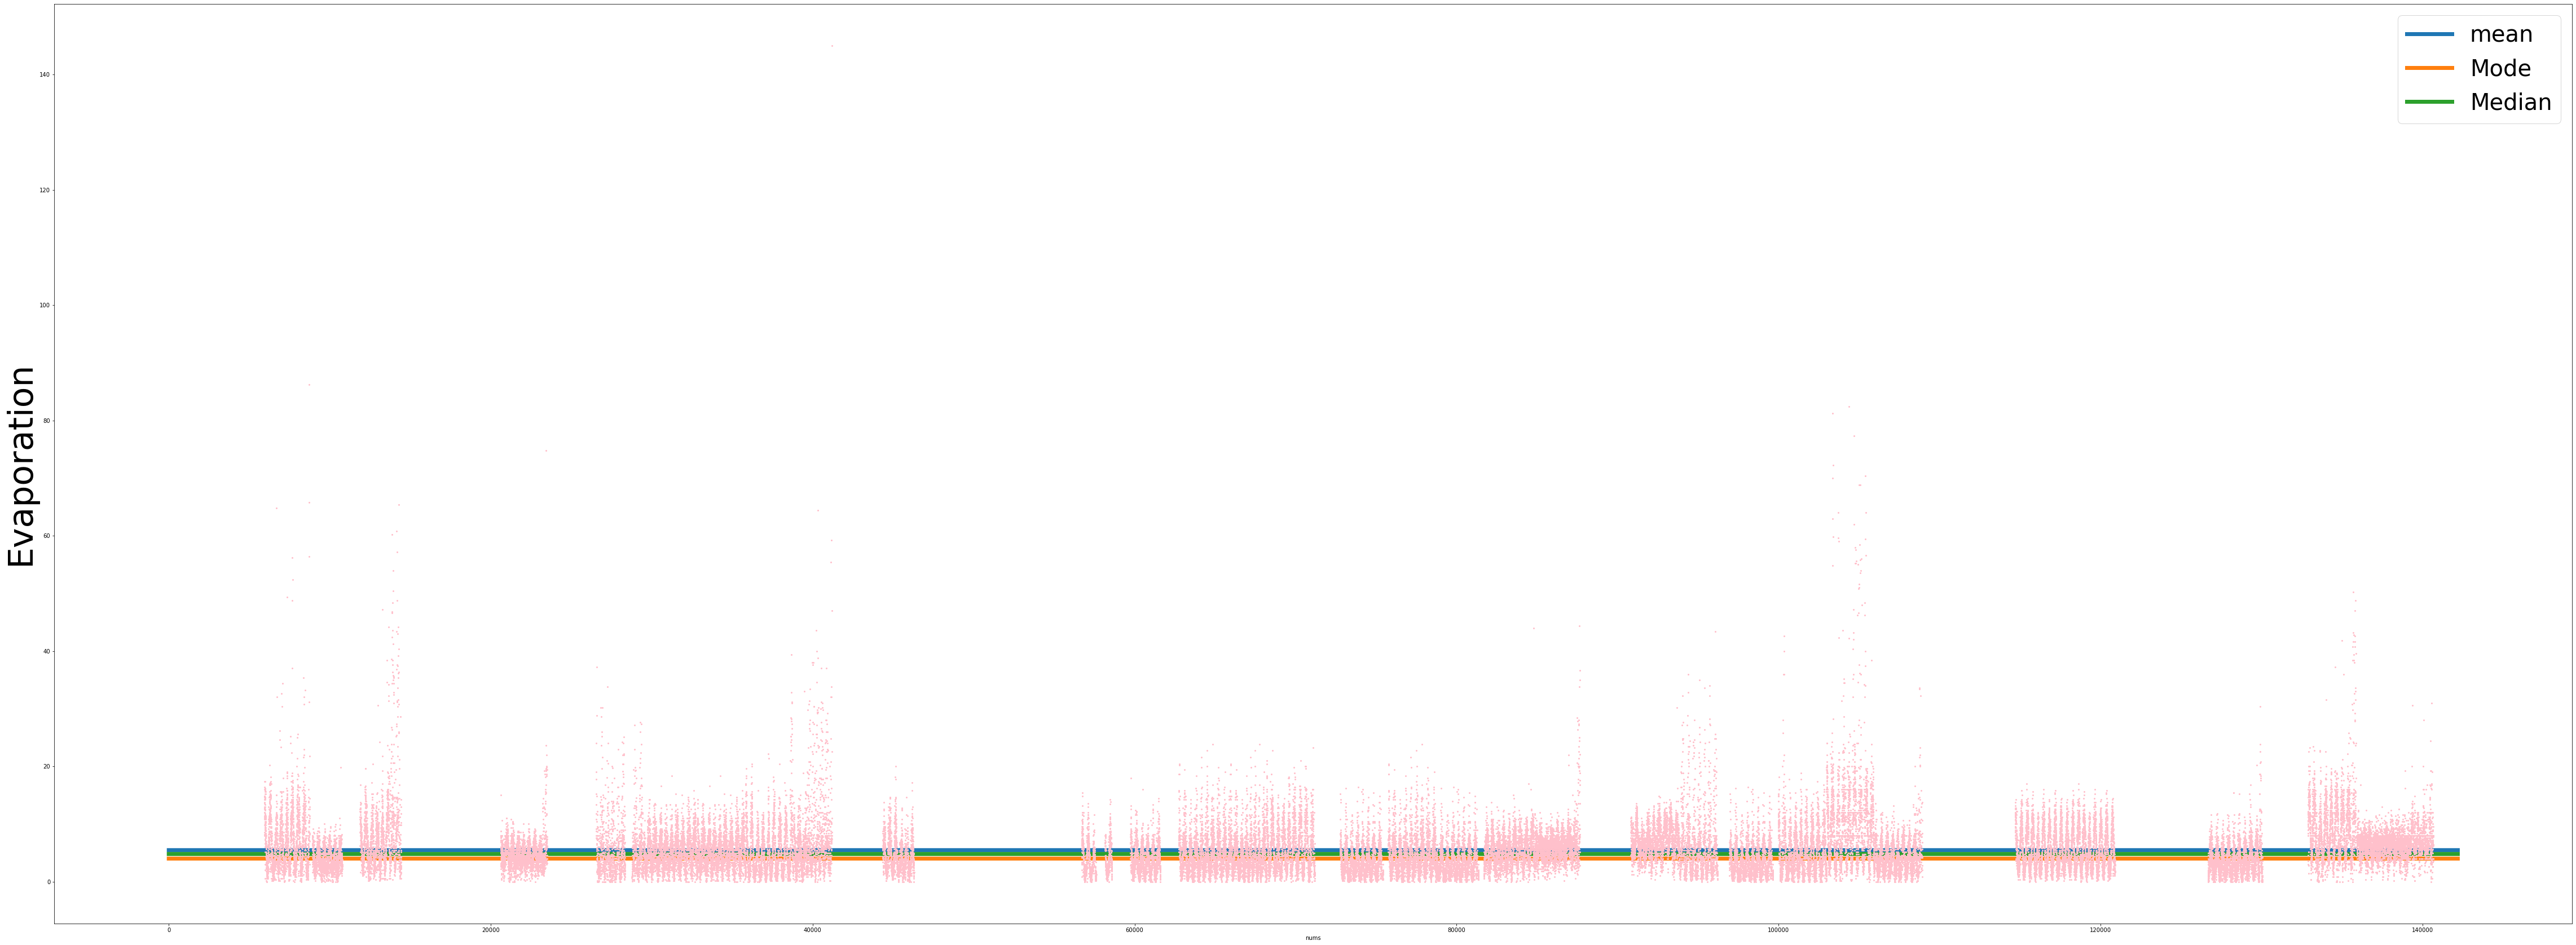

Mean:  7.624853113193571  Median:  8.5


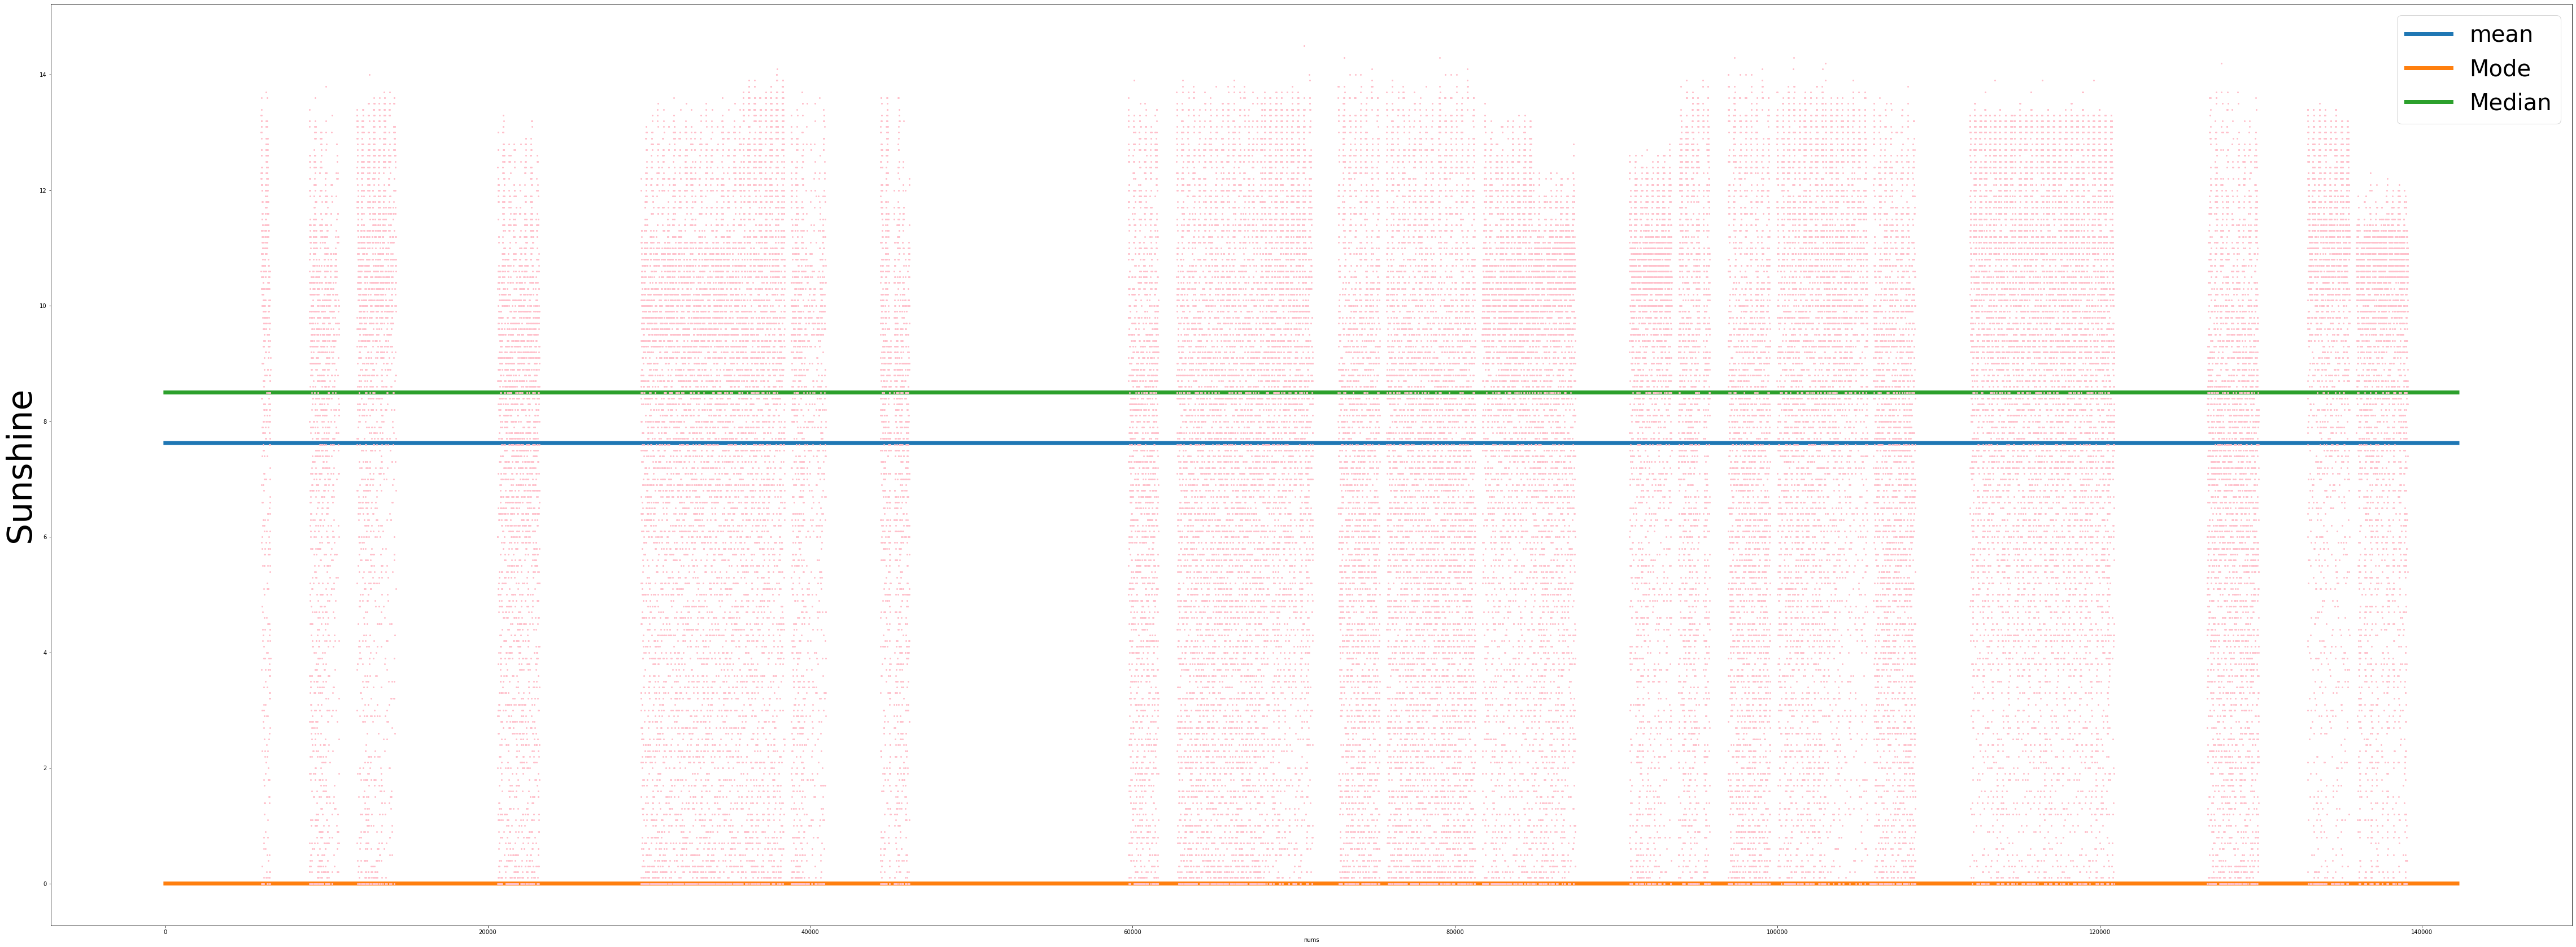

Mean:  39.98429165757619  Median:  39.0


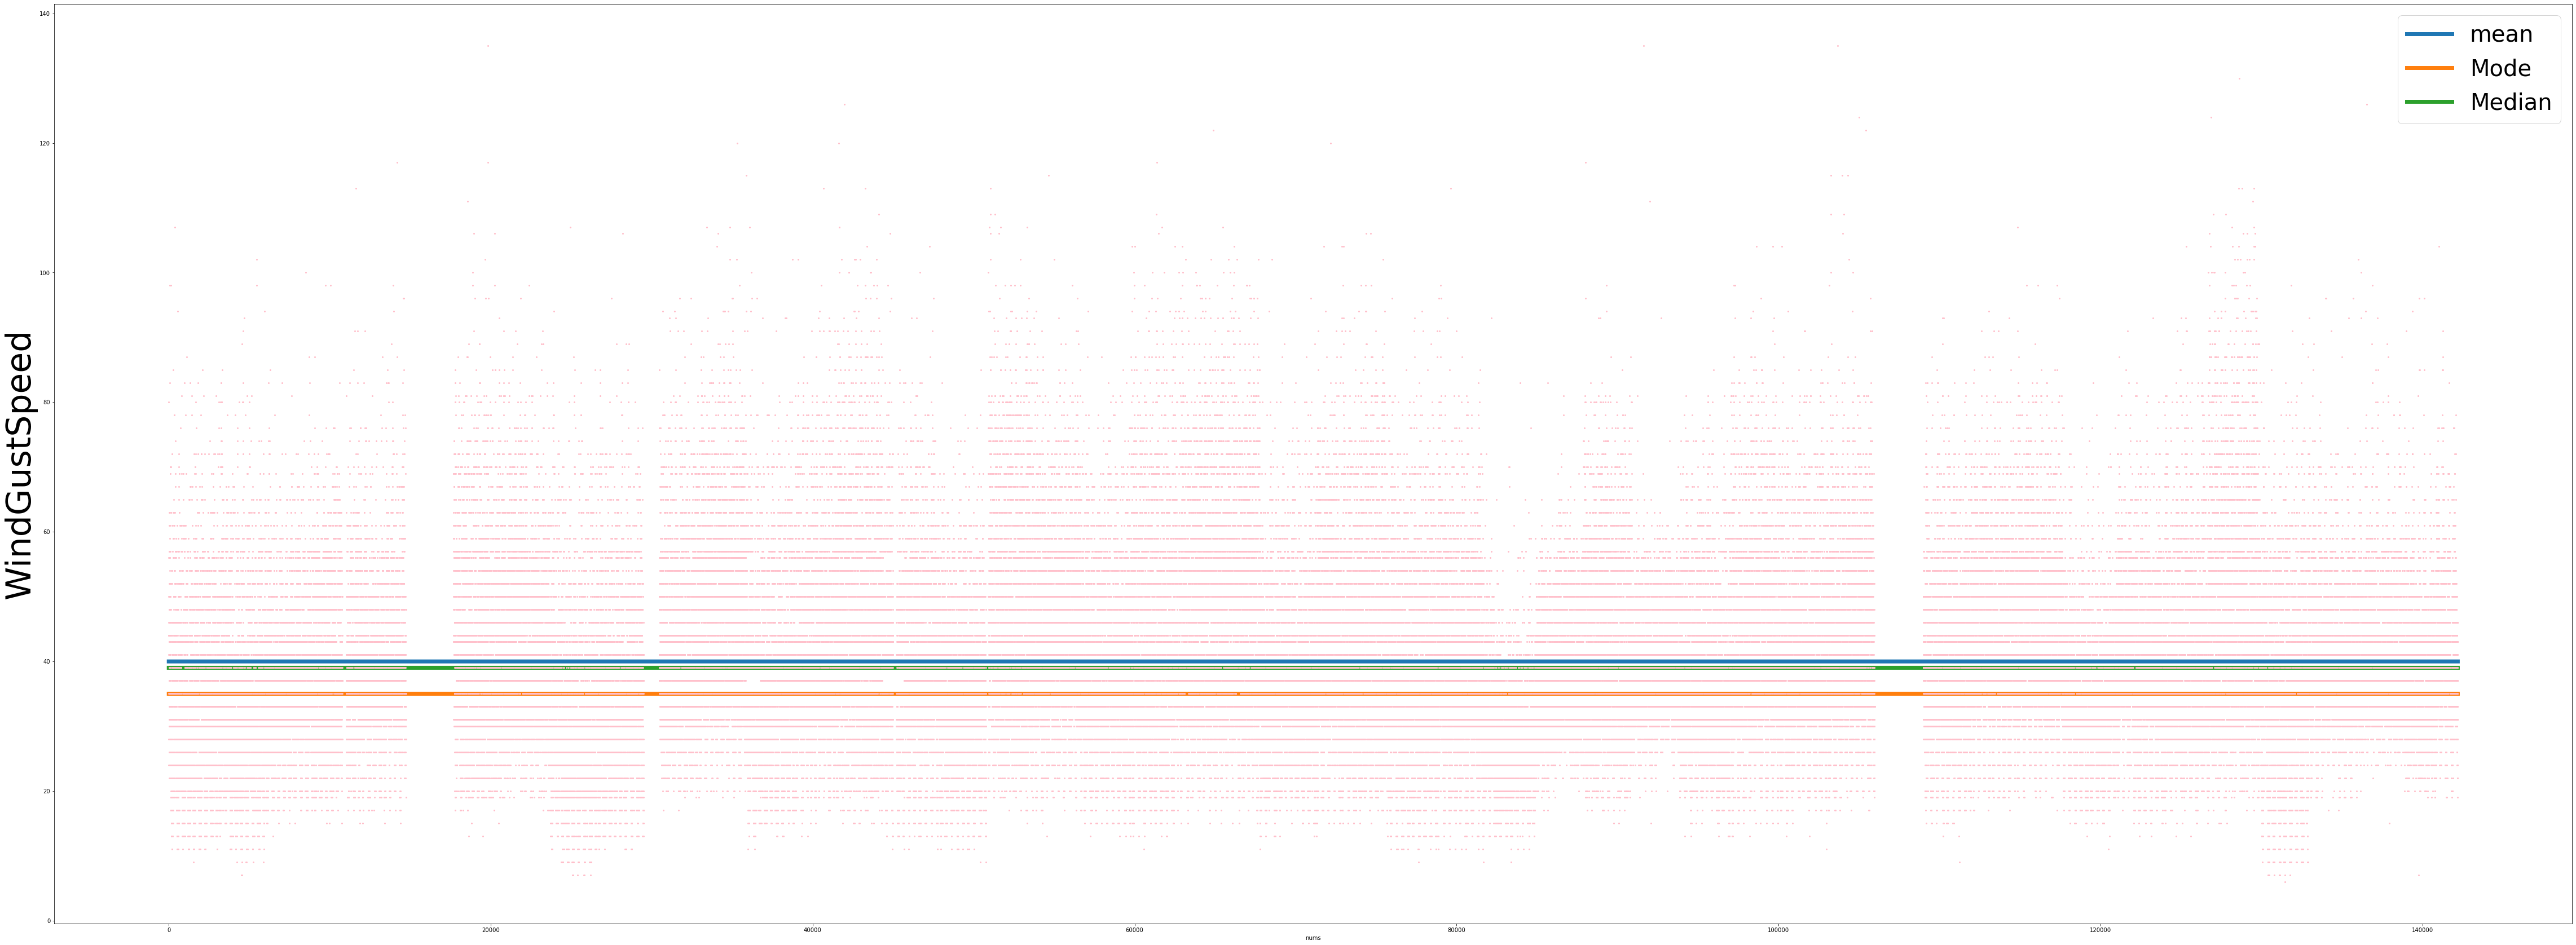

Mean:  1017.6537584159781  Median:  1017.6


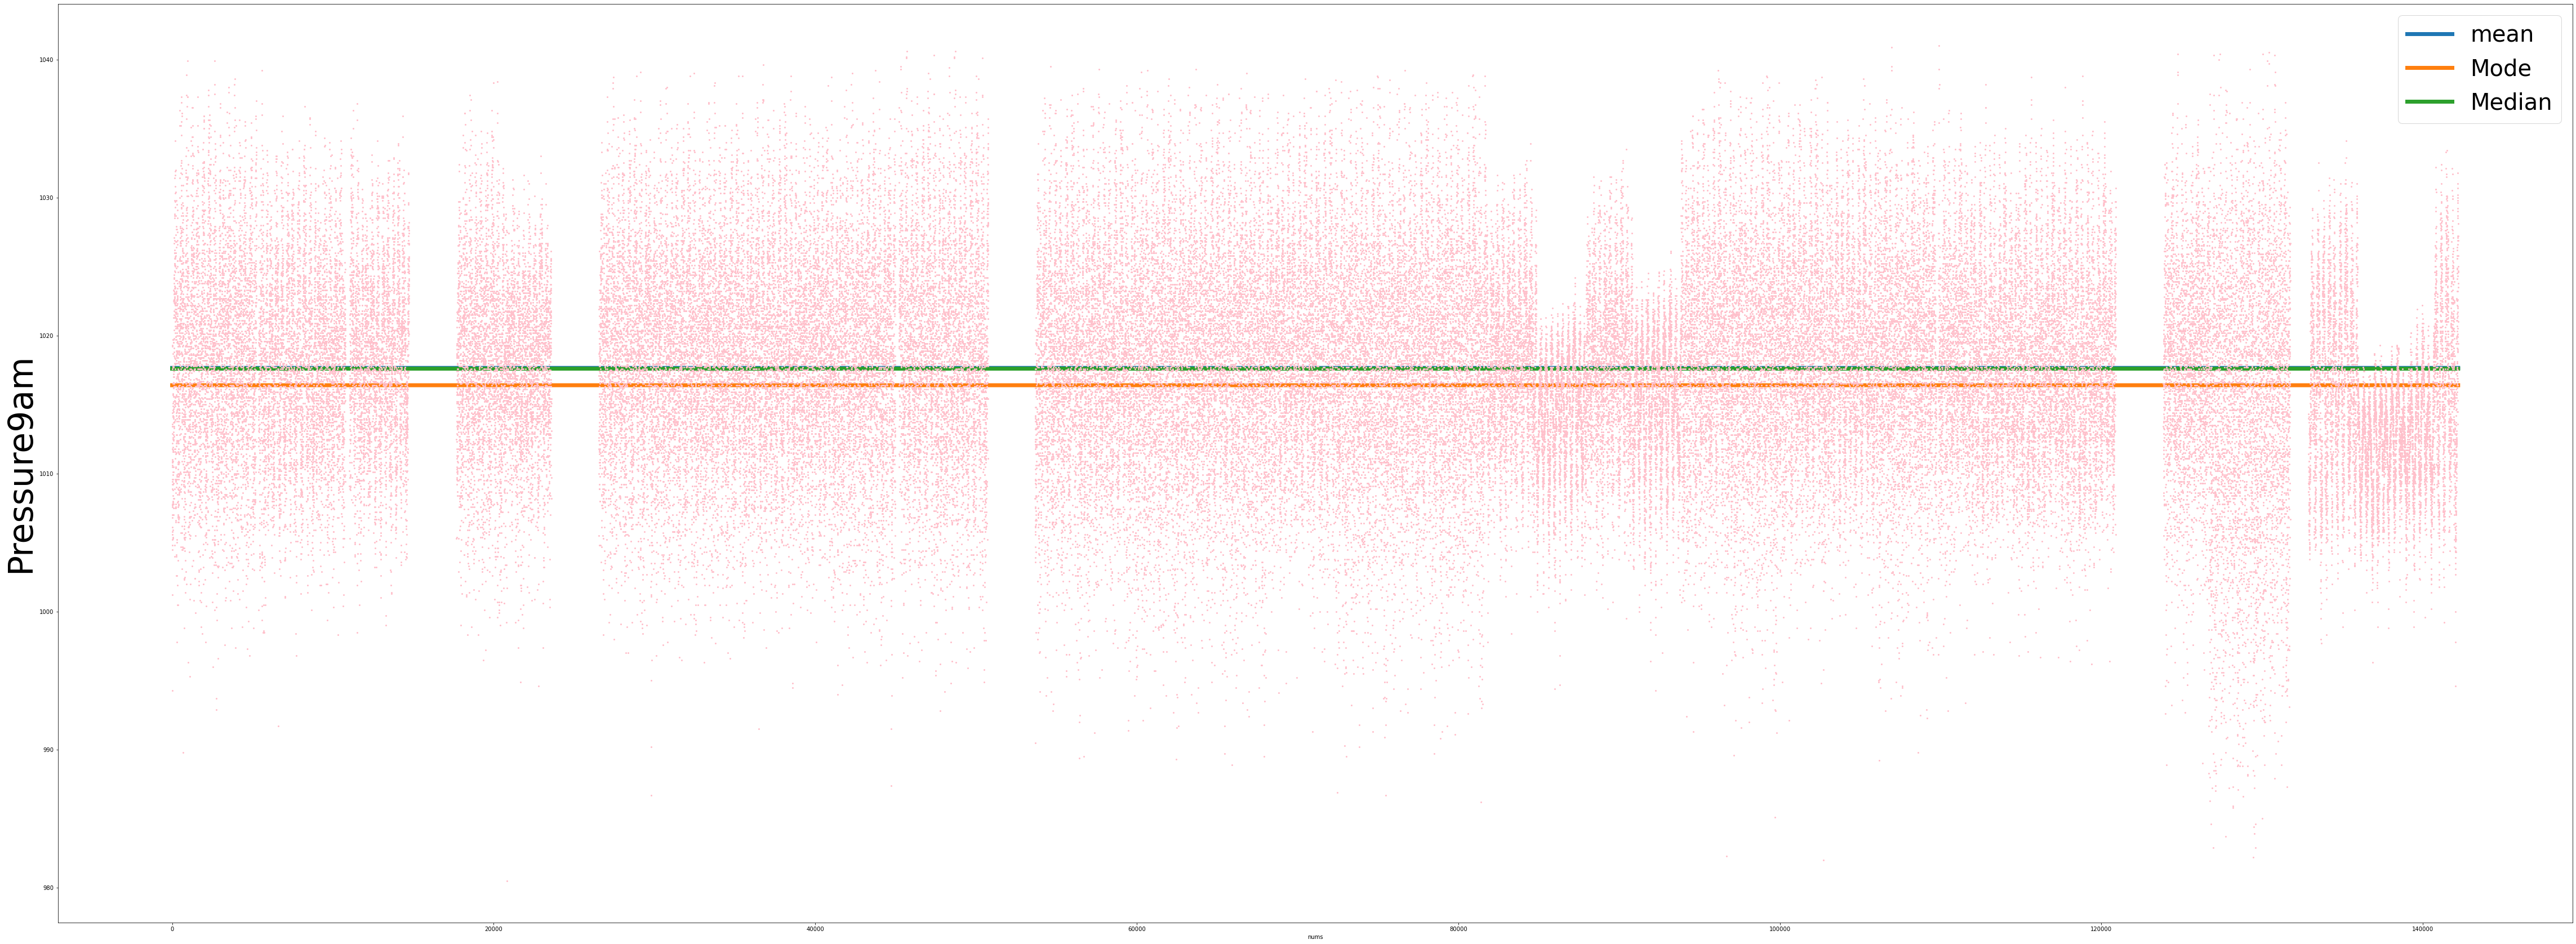

Mean:  1015.258203537907  Median:  1015.2


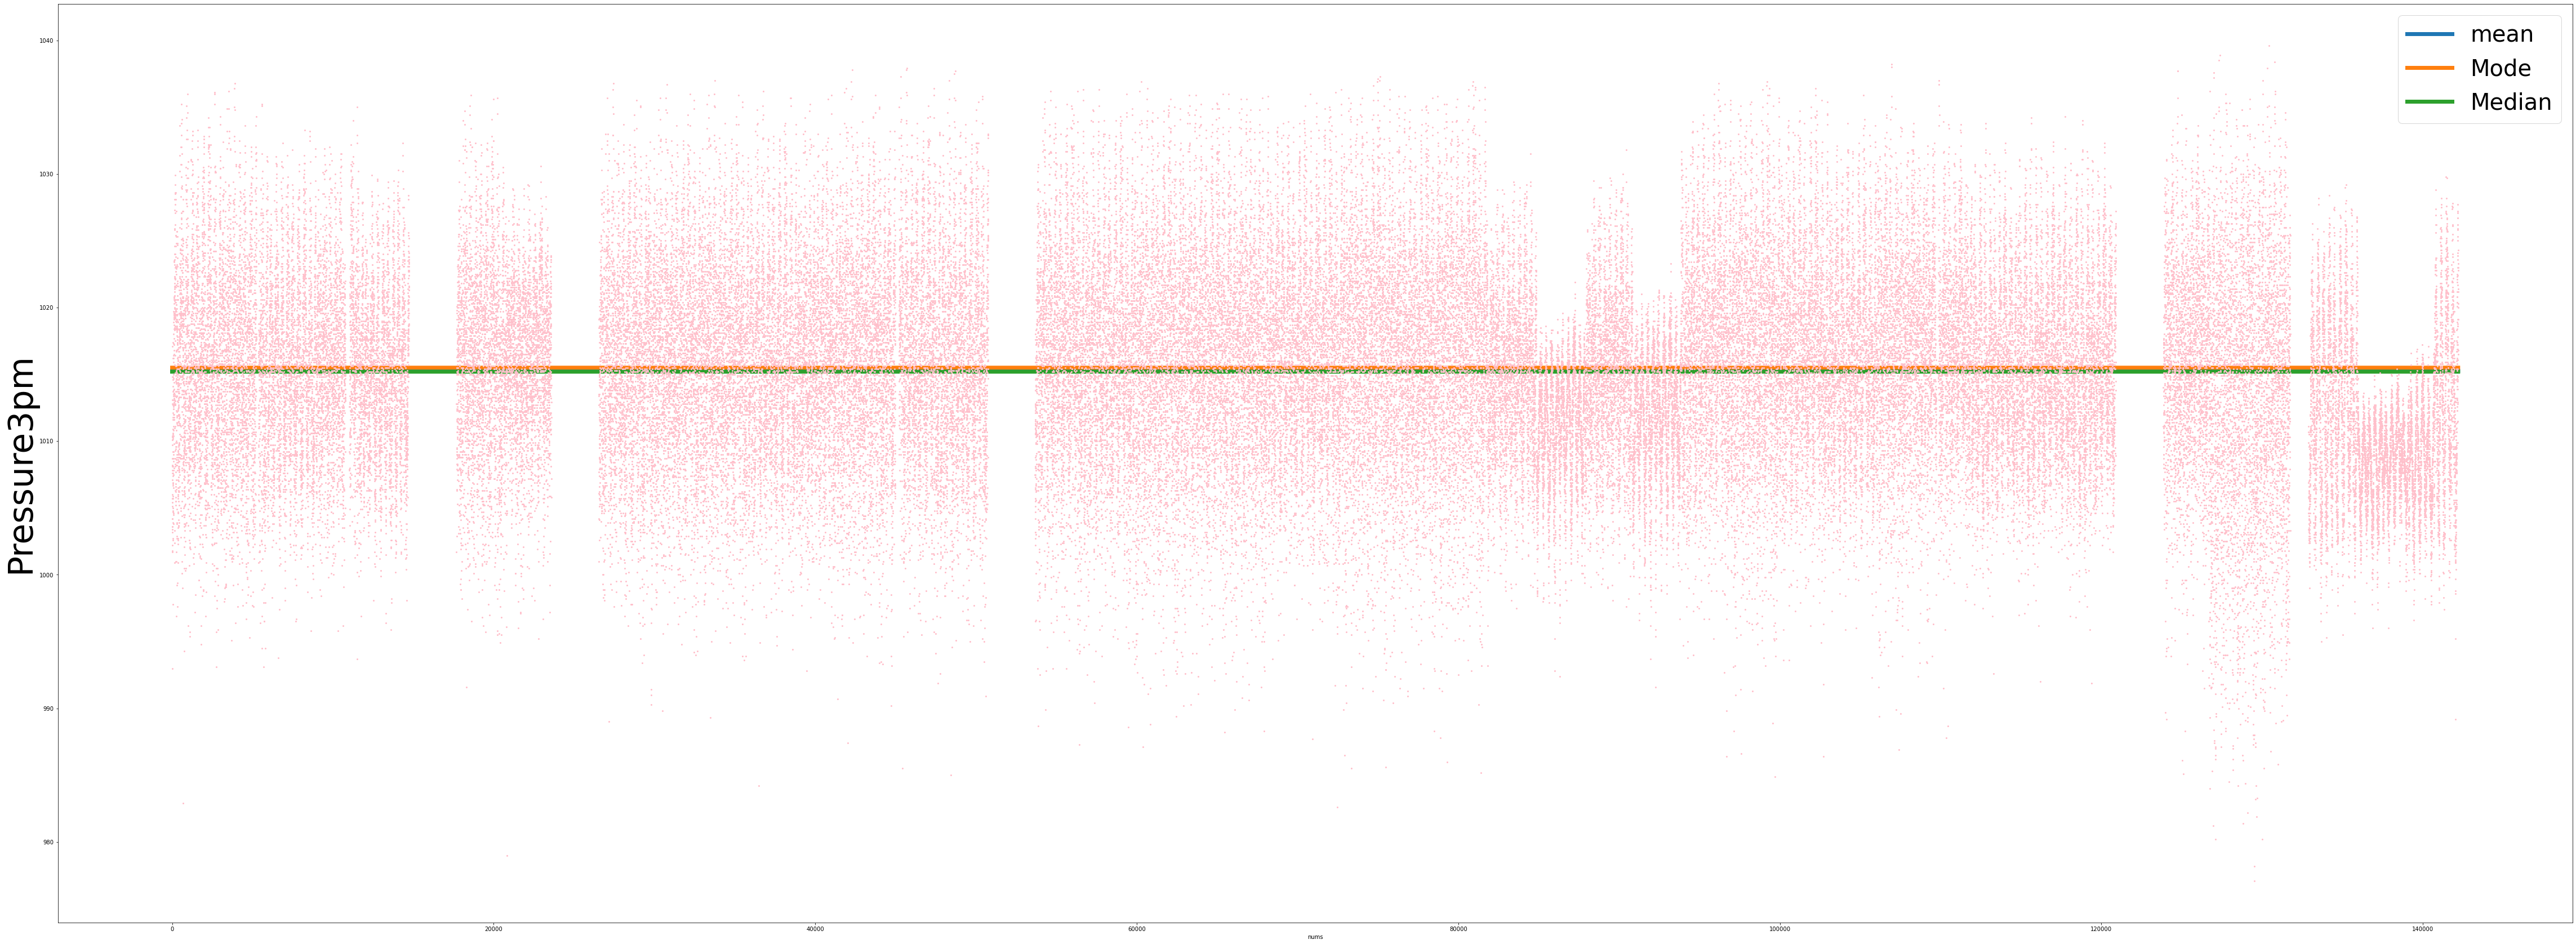

Mean:  4.437189391885787  Median:  5.0


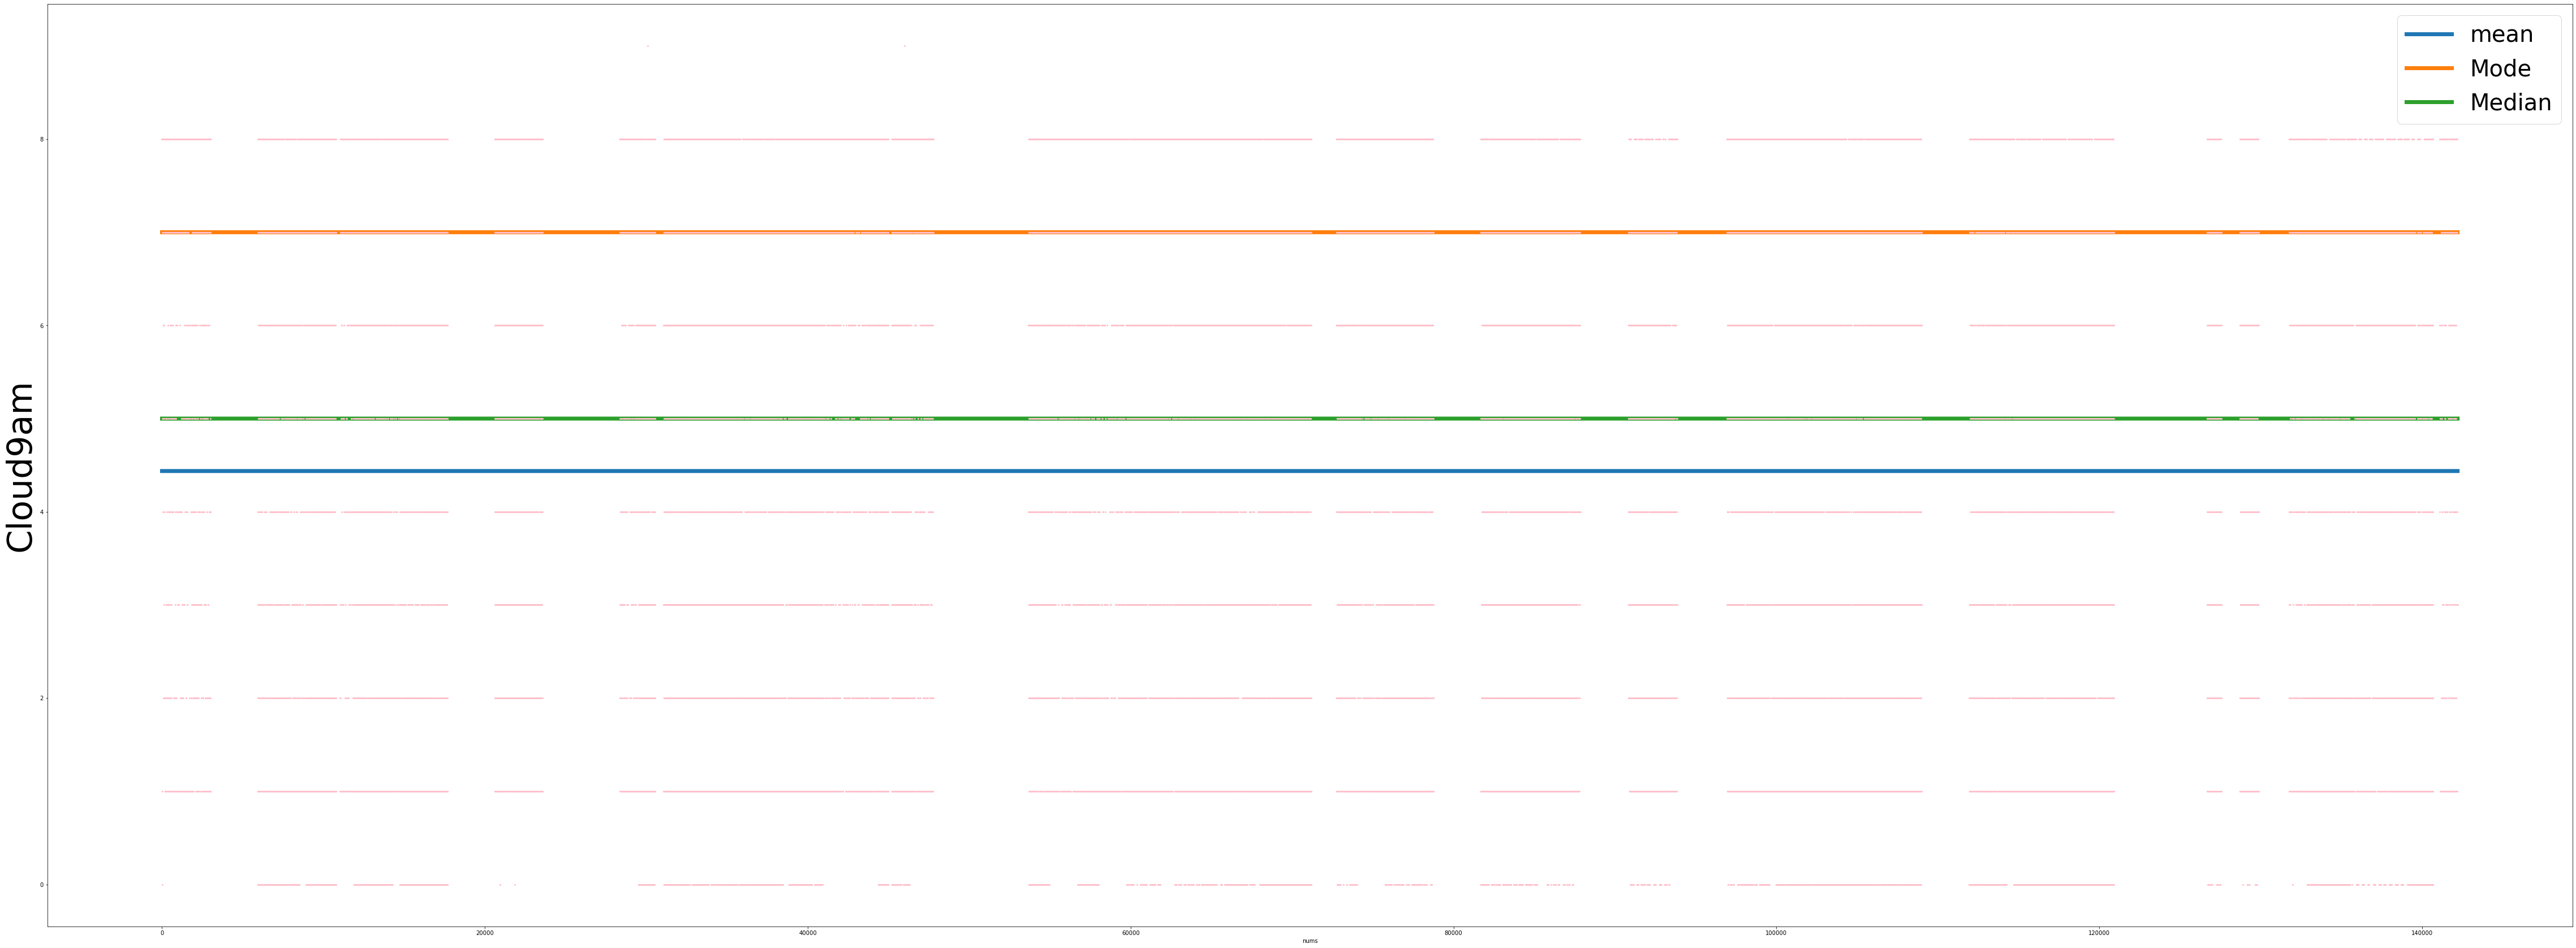

Mean:  4.503166899728551  Median:  5.0


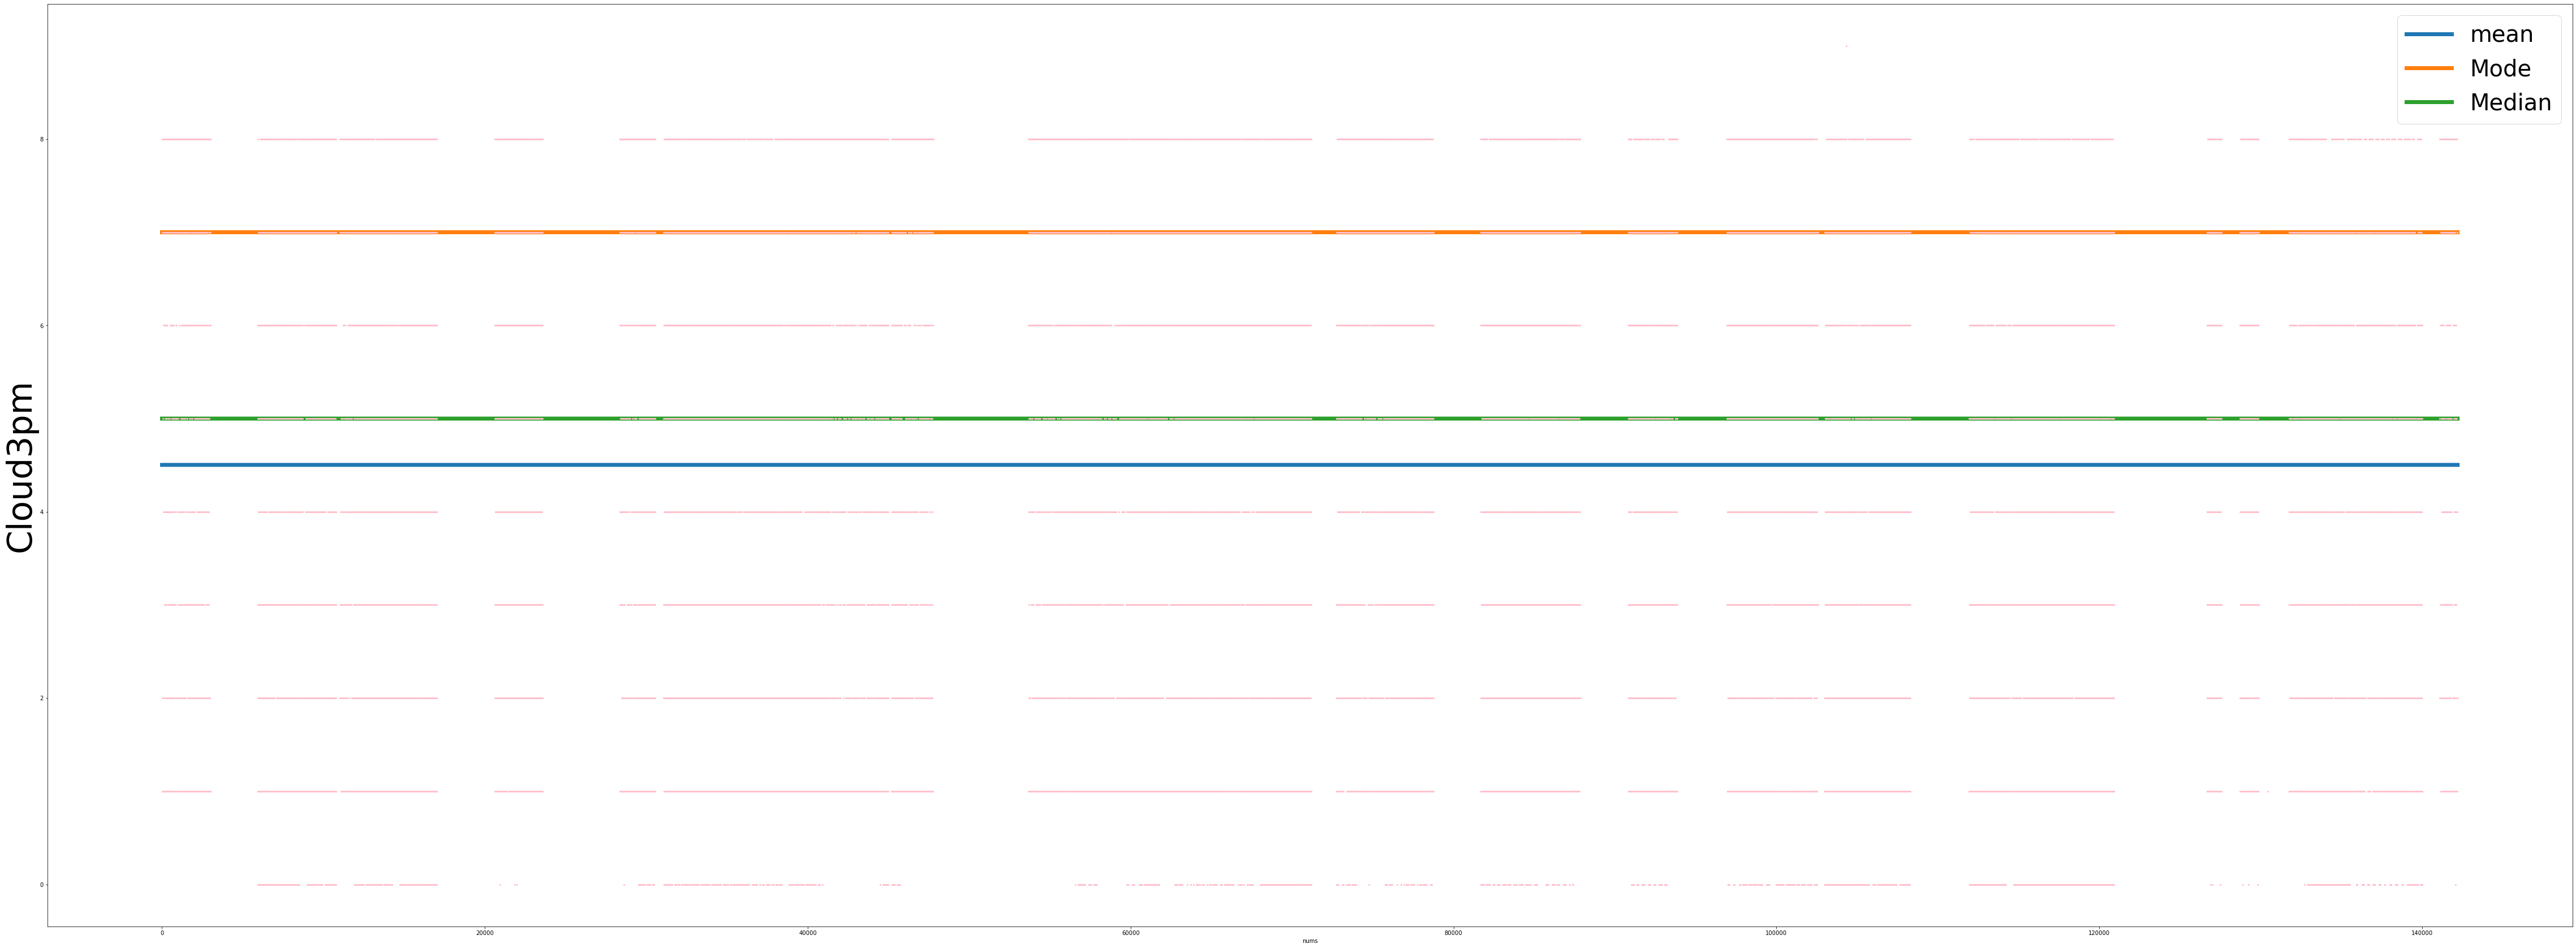

In [10]:
i=0
categoricals , numericals = [], []
for j in df.columns:
    if(df[j].dtype == 'object'):
        categoricals.append(j)
    else:
        numericals.append(j)
# for j in numericals:
checklist = ['Evaporation','Sunshine','WindGustSpeed','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm']
for j in checklist:
    print("Mean: ", df[j].mean() , " Median: ", df[j].median())
    f = plt.figure()
    f.set_figwidth(80)
    f.set_figheight(30)
    ypoints = df[j]
    xpoints = np.arange(0,len(df[j]),1)
    meanpoint = np.linspace(df[j].mean(),df[j].mean(),len(xpoints))
    modepoint = np.linspace(df[j].mode(),df[j].mode(),len(xpoints))
    medianpoint= np.linspace(df[j].median(),df[j].median(),len(xpoints))
    plt.plot(xpoints, meanpoint, linewidth=7.0)
    plt.plot(xpoints, modepoint, linewidth=7.0)
    plt.plot(xpoints, medianpoint, linewidth=7.0)
    plt.legend(["mean", "Mode" , "Median", "data"],fontsize=40)
    plt.plot(xpoints, ypoints , 'o', markersize = 2 , color = 'Pink')
    plt.xlabel('nums')
    plt.ylabel(j , fontsize=60)
    # plt.savefig(j+'.jpeg')
    plt.show()
    

In [14]:
print(df['RainTomorrow'].value_counts())
print(df['RainToday'].value_counts())

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64
No     109332
Yes     31455
Name: RainToday, dtype: int64


In [15]:
print(df.isna().sum())

Date                 0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


In [16]:
k = df
drows =  ['MinTemp','MaxTemp','Rainfall','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday']
k = k.dropna(subset = drows)
k

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       2008-12-01     13.4     22.9       0.6          NaN       NaN   
1       2008-12-02      7.4     25.1       0.0          NaN       NaN   
2       2008-12-03     12.9     25.7       0.0          NaN       NaN   
3       2008-12-04      9.2     28.0       0.0          NaN       NaN   
4       2008-12-05     17.5     32.3       1.0          NaN       NaN   
...            ...      ...      ...       ...          ...       ...   
142188  2017-06-20      3.5     21.8       0.0          NaN       NaN   
142189  2017-06-21      2.8     23.4       0.0          NaN       NaN   
142190  2017-06-22      3.6     25.3       0.0          NaN       NaN   
142191  2017-06-23      5.4     26.9       0.0          NaN       NaN   
142192  2017-06-24      7.8     27.0       0.0          NaN       NaN   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0                44.0          20.0          24.0         71.0         22.0   
1                44.0           4.0          22.0         44.0         25.0   
2                46.0          19.0          26.0         38.0         30.0   
3                24.0          11.0           9.0         45.0         16.0   
4                41.0           7.0          20.0         82.0         33.0   
...               ...           ...           ...          ...          ...   
142188           31.0          15.0          13.0         59.0         27.0   
142189           31.0          13.0          11.0         51.0         24.0   
142190           22.0          13.0           9.0         56.0         21.0   
142191           37.0           9.0           9.0         53.0         24.0   
142192           28.0          13.0           7.0         51.0         24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
142188       1024.7       1021.2       NaN       NaN      9.4     20.9   
142189       1024.6       1020.3       NaN       NaN     10.1     22.4   
142190       1023.5       1019.1       NaN       NaN     10.9     24.5   
142191       1021.0       1016.8       NaN       NaN     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

       RainToday  RISK_MM RainTomorrow  
0             No      0.0           No  
1             No      0.0           No  
2             No      0.0           No  
3             No      1.0           No  
4             No      0.2           No  
...          ...      ...          ...  
142188        No      0.0           No  
142189        No      0.0           No  
142190        No      0.0           No  
142191        No      0.0           No  
142192        No      0.0           No  

[135643 rows x 20 columns]

In [14]:
print(k.isna().sum())

Unnamed: 0           0
Date                 0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine         62631
WindGustSpeed        0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM              0
RainTomorrow         0
AvgPressure      11514
dtype: int64


In [18]:
k['AvgPressure'] = k[['Pressure9am', 'Pressure3pm']].mean(axis=1)
# k['AvgCloud'] = k[['Cloud9am', 'Cloud3pm']].mean(axis=1)
k['WindGustSpeed']= k['WindGustSpeed'].fillna(k['WindGustSpeed'].mean())
k['Evaporation']= k['Evaporation'].fillna(k['Evaporation'].median())
k = k.drop(columns=['Pressure9am','Pressure3pm'])
print(k.isna().sum())

Date                 0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine         62631
WindGustSpeed        0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Cloud9am         50539
Cloud3pm         51926
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM              0
RainTomorrow         0
AvgPressure      11514
dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_16336\886469945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k['AvgPressure'] = k[['Pressure9am', 'Pressure3pm']].mean(axis=1)
C:\Users\Asus\AppData\Local\Temp\ipykernel_16336\886469945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k['WindGustSpeed']= k['WindGustSpeed'].fillna(k['WindGustSpeed'].mean())
C:\Users\Asus\AppData\Local\Temp\ipykernel_16336\886469945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [19]:
z = k.dropna()
# x = z[['MaxTemp', 'Rainfall', 'Evaporation', 'Humidity9am', 'Humidity3pm', 'AvgPressure', 'Temp3pm']]
x = z.drop(columns=categoricals)
x = x.drop(columns= ['Cloud9am'])
y = z['Cloud9am']
X = x.values
Y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20 , random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=11, metric='l2', weights='distance')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)
# print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[4. 1. 8. ... 3. 7. 0.]
              precision    recall  f1-score   support

         0.0       0.51      0.51      0.51      1217
         1.0       0.39      0.58      0.47      2335
         2.0       0.17      0.10      0.12       973
         3.0       0.16      0.09      0.11       868
         4.0       0.11      0.04      0.06       656
         5.0       0.11      0.05      0.07       835
         6.0       0.17      0.10      0.12      1228
         7.0       0.46      0.68      0.55      3263
         8.0       0.54      0.38      0.45      1394
         9.0       0.00      0.00      0.00         1

    accuracy                           0.40     12770
   macro avg       0.26      0.25      0.25     12770
weighted avg       0.35      0.40      0.36     12770



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# parameters = {"n_neighbors": range(10, 80)}
# gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
# gridsearch.fit(X_train, y_train)
# gridsearch.best_params_


KeyboardInterrupt



In [ ]:
z = k.dropna()
# x = z[['MaxTemp', 'Rainfall', 'Evaporation', 'Humidity9am', 'Humidity3pm', 'AvgPressure', 'Temp3pm']]
x = z.drop(columns=categoricals)
x = x.drop(columns= ['Cloud3pm'])
y = z['Cloud3pm']
X = x.values
Y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20 , random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=15, metric='l2', weights='distance')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)
# print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [22]:
warnings.filterwarnings('ignore')

print(z['Cloud9am'].value_counts())
print(z['Cloud3pm'].value_counts())
print((k.isna().sum())['Cloud9am'])
print((k.isna().sum())['Cloud3pm'])

cnt1 = z['Cloud9am'].count()
cnt2 = z['Cloud3pm'].count()

a1 = z['Cloud9am'].value_counts()
a2 = z['Cloud3pm'].value_counts()

a3 = a1 * (k.isna().sum())['Cloud9am'] / cnt1
a4 = a2 * (k.isna().sum())['Cloud3pm'] / cnt2

print(a3)
print(a4)
l1=[]
l2=[]

for i in range(10):
    print(i)
    l1.extend([i for j in range(math.ceil(a3[i]))])
    l2.extend([i for j in range(math.ceil(a4[i]))])

random.shuffle(l1)
random.shuffle(l2)
print(len(l1))
print(len(l2))
l1 = l1[0:(k.isna().sum())['Cloud9am']]
l2 = l2[0:(k.isna().sum())['Cloud3pm']]
print(len(l1))
print(len(l2))

k.reset_index(drop=True, inplace=True)

cnt = 0
for i,v in enumerate(k['Cloud9am'].tolist()):
    if math.isnan(v):
        # print(i, ': ' ,k['Cloud9am'][i])
        k['Cloud9am'][i] = l1[cnt]
        cnt += 1
print(k.isna().sum())

7.0    16028
1.0    11813
8.0     6786
6.0     6167
0.0     6040
2.0     4881
3.0     4641
5.0     4270
4.0     3220
9.0        1
Name: Cloud9am, dtype: int64
7.0    15268
1.0    11307
6.0     7168
8.0     5787
2.0     5546
3.0     5425
5.0     5333
0.0     4052
4.0     3960
9.0        1
Name: Cloud3pm, dtype: int64
50539
51926
7.0    12687.191129
1.0     9350.747991
8.0     5371.554717
6.0     4881.576472
0.0     4781.047817
2.0     3863.624900
3.0     3673.649490
5.0     3379.979169
4.0     2548.836750
9.0        0.791564
Name: Cloud9am, dtype: float64
7.0    12417.281438
1.0     9195.847604
6.0     5829.648503
8.0     4706.497752
2.0     4510.495340
3.0     4412.087490
5.0     4337.264993
0.0     3295.443044
4.0     3220.620546
9.0        0.813288
Name: Cloud3pm, dtype: float64
0
1
2
3
4
5
6
7
8
9
50543
51931
50539
51926
Date                 0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine         62631
WindGustSpeed        0
Win

In [23]:
cnt = 0
for i,v in enumerate(k['Cloud3pm'].tolist()):
    if math.isnan(v):
        # print(i, ': ' ,k['Cloud9am'][i])
        k['Cloud3pm'][i] = l2[cnt]
        cnt += 1
print(k.isna().sum())

Date                 0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine         62631
WindGustSpeed        0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM              0
RainTomorrow         0
AvgPressure      11514
dtype: int64


In [24]:
# from sklearn.preprocessing import PolynomialFeatures
# z = k.dropna()
# x = z[['MaxTemp', 'Rainfall', 'Evaporation', 'Humidity9am', 'Humidity3pm', 'AvgPressure', 'Temp3pm']]
# x = z.drop(columns=categoricals)
# y = z['Cloud3pm']
# X = x.values
# Y = y.values

# poly = PolynomialFeatures(degree = 4)
# X_poly = poly.fit_transform(X)
k.to_csv('out.csv')

Mean:  4.382305021269066  Median:  5.0


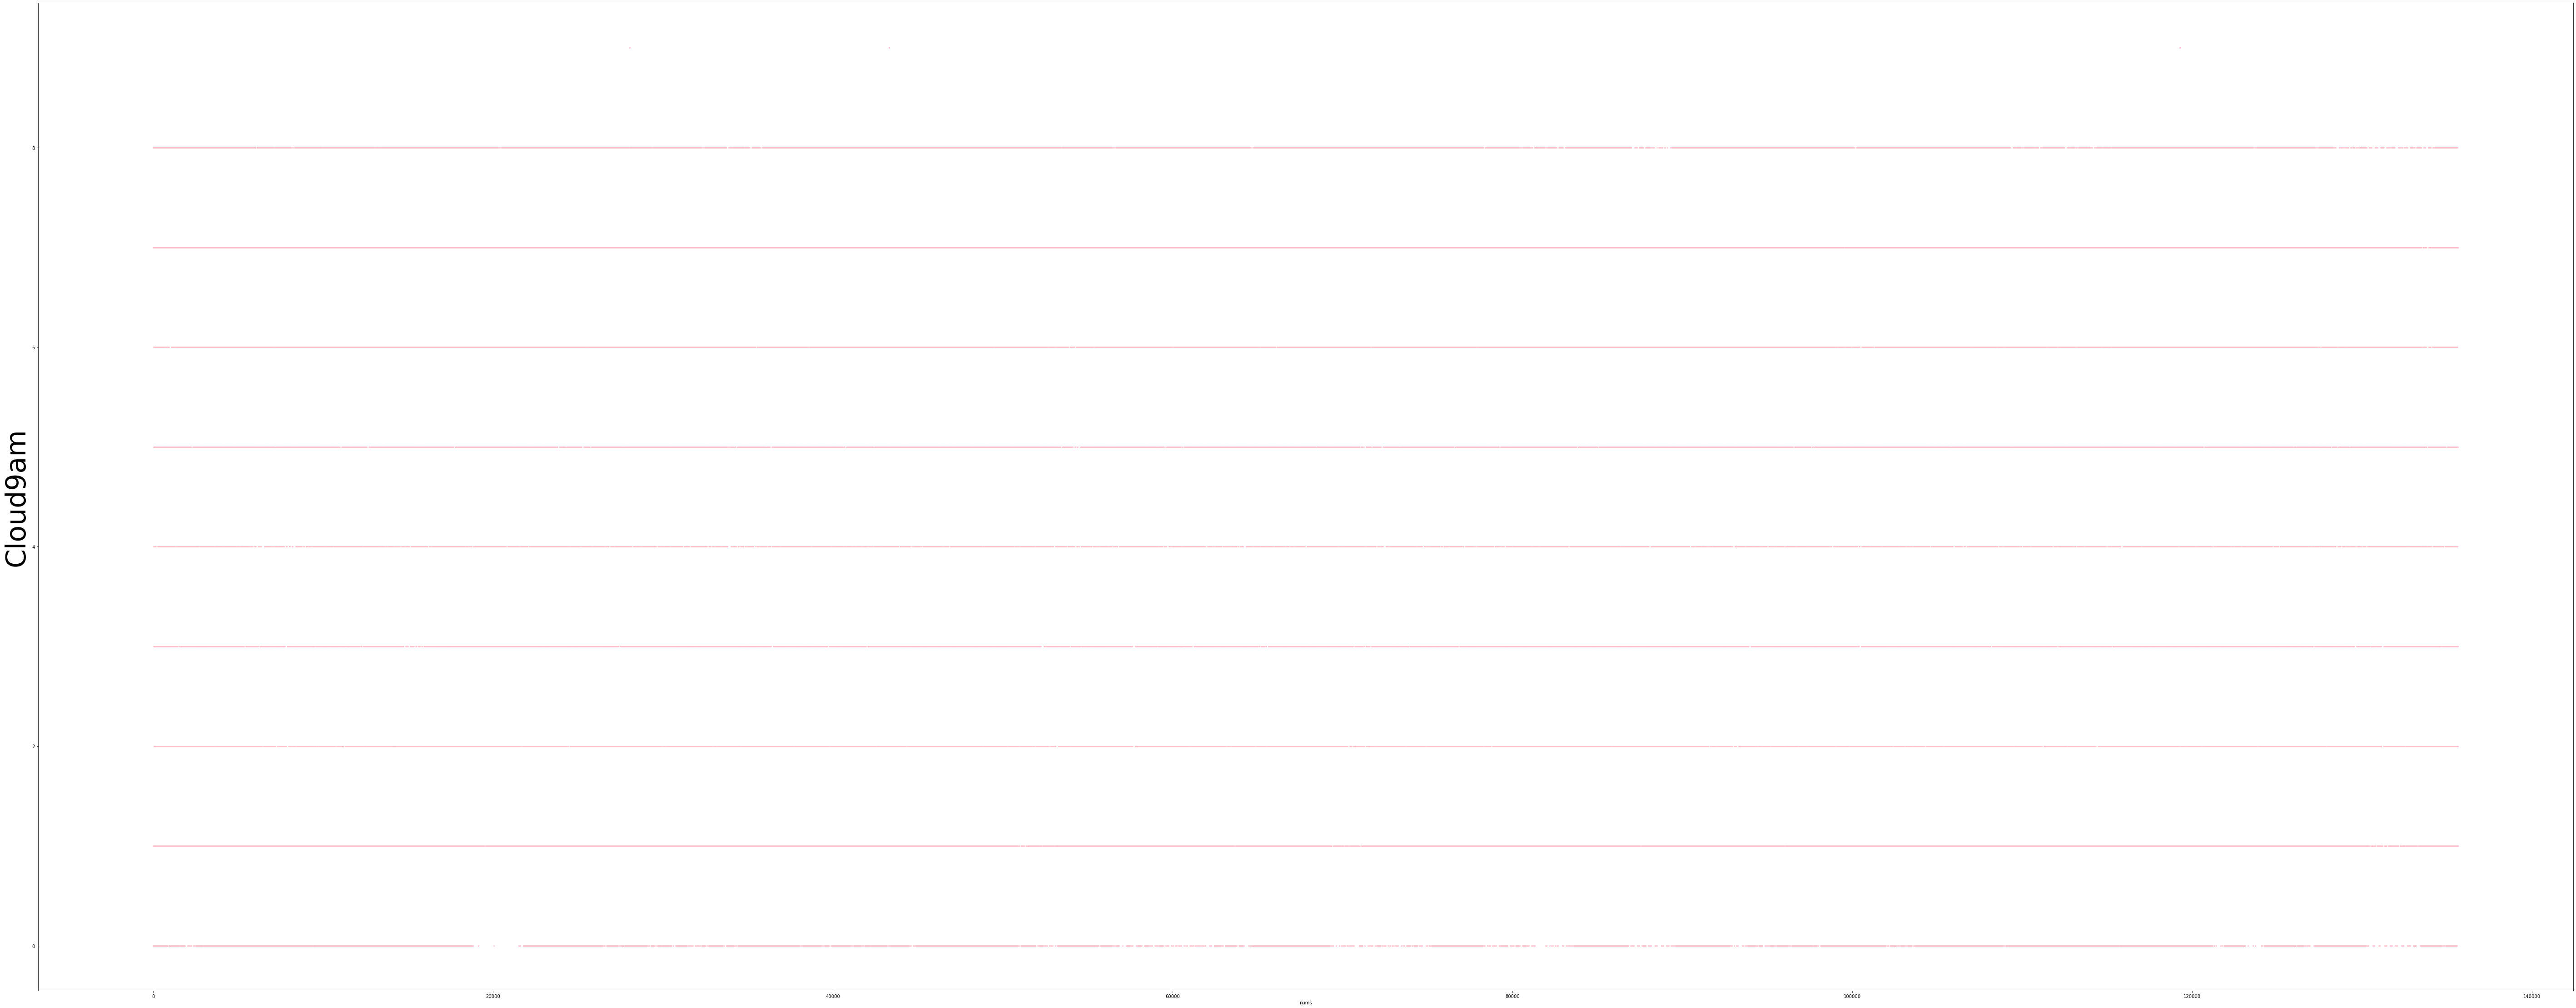

Mean:  4.441674100395892  Median:  5.0


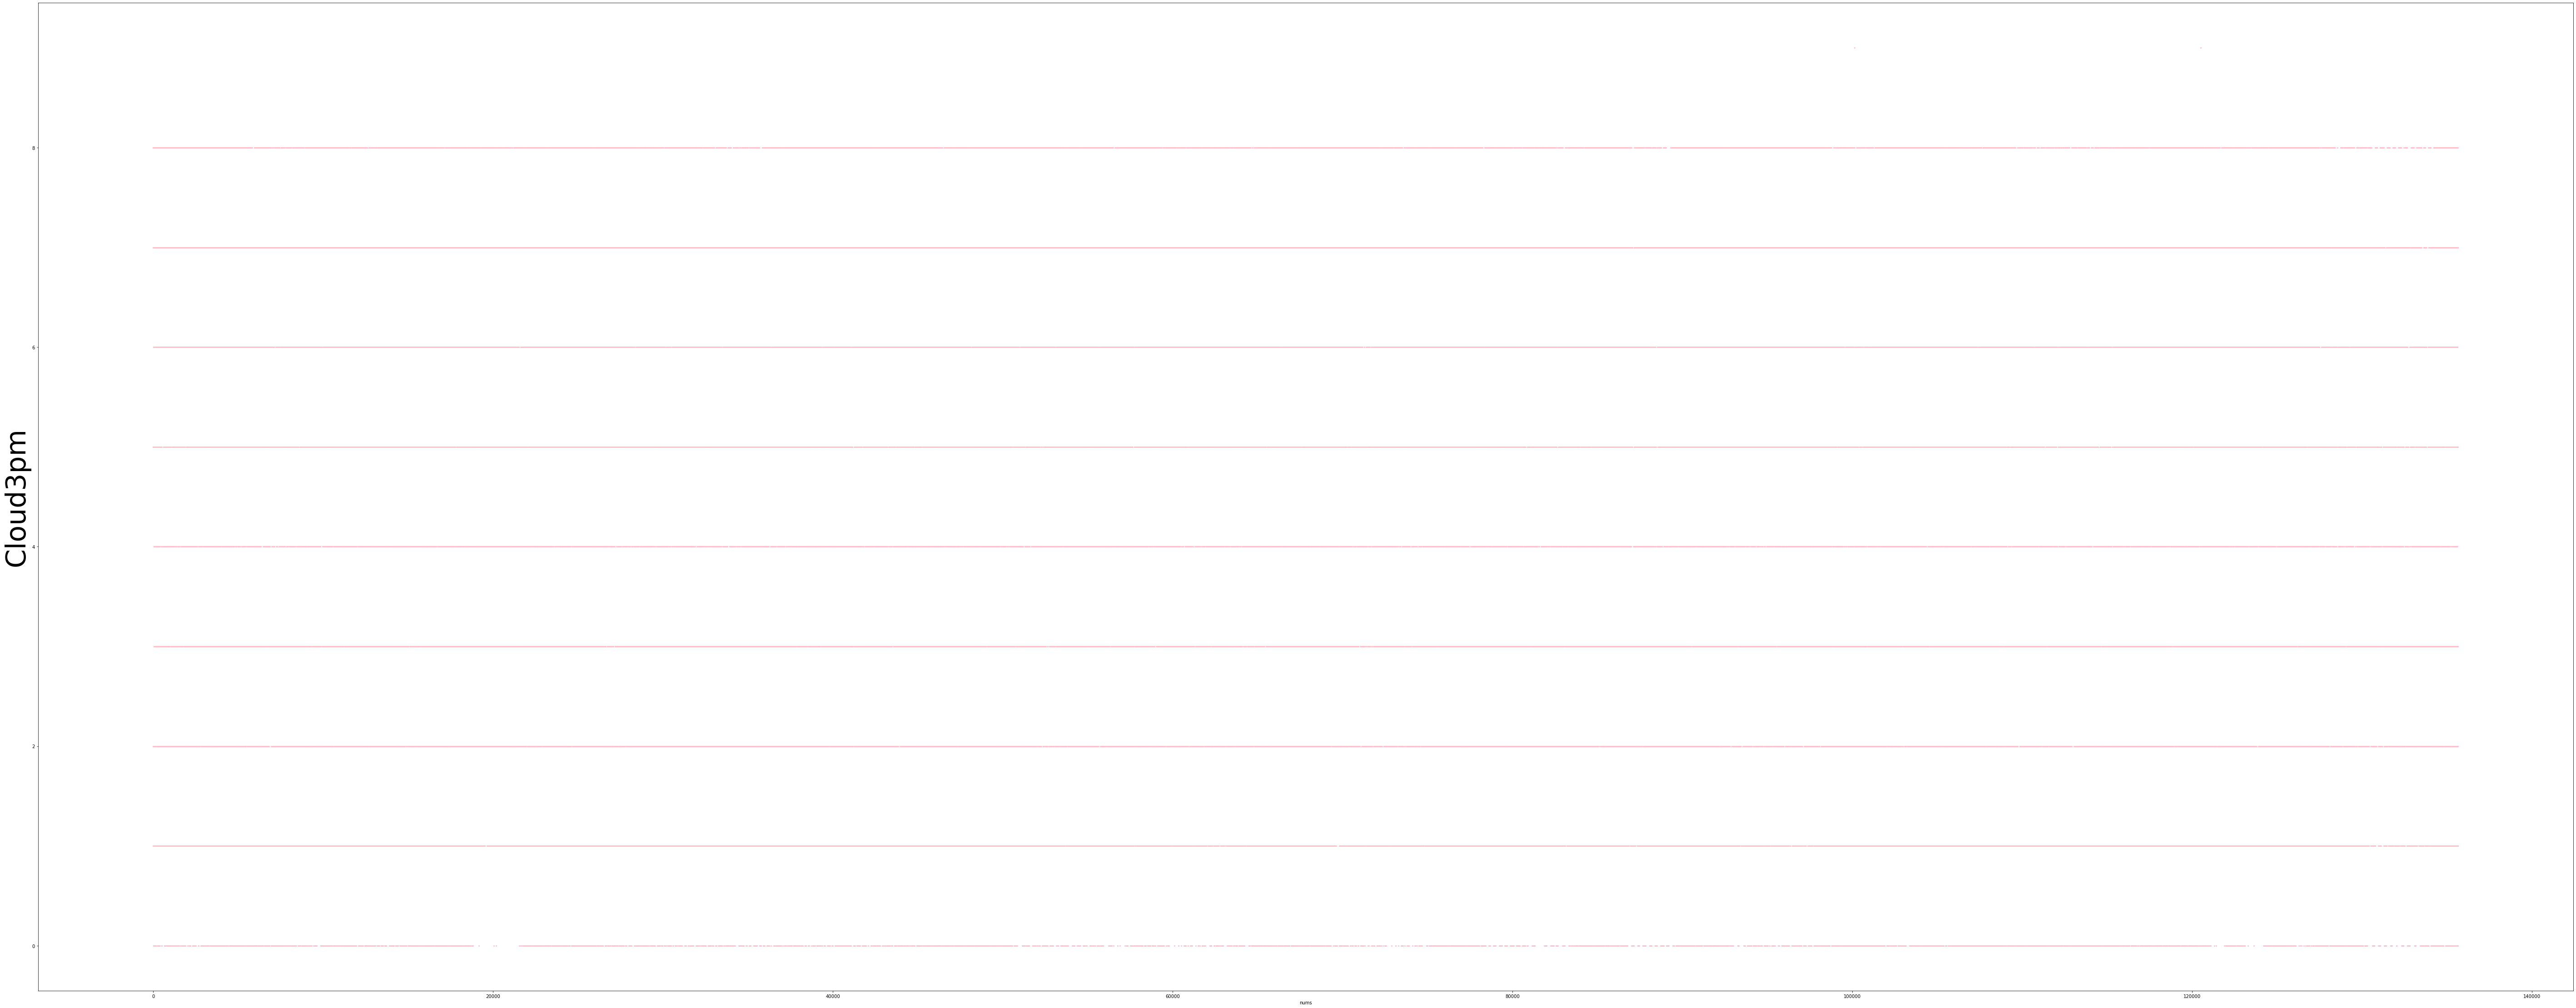

In [11]:
k = pd.read_csv('out.csv')
checklist = ['Cloud9am','Cloud3pm']
for j in checklist:
    print("Mean: ", k[j].mean() , " Median: ", k[j].median())
    f = plt.figure()
    f.set_figwidth(100)
    f.set_figheight(40)
    ypoints = k[j]
    xpoints = np.arange(0,len(k[j]),1)
    meanpoint = np.linspace(k[j].mean(),k[j].mean(),len(xpoints))
    modepoint = np.linspace(k[j].mode(),k[j].mode(),len(xpoints))
    medianpoint= np.linspace(k[j].median(),k[j].median(),len(xpoints))
    # plt.plot(xpoints, meanpoint, linewidth=7.0)
    # plt.plot(xpoints, modepoint, linewidth=7.0)
    # plt.plot(xpoints, medianpoint, linewidth=7.0)
    # plt.legend(["mean", "Mode" , "Median", "data"],fontsize=40)
    plt.plot(xpoints, ypoints , 'o', markersize = 2 , color = 'Pink')
    plt.xlabel('nums')
    plt.ylabel(j , fontsize=60)
    # plt.savefig(j+'.jpeg')
    plt.show()
    

In [18]:
# dropping nan value of dataFrame, k_ennan ==> k empty nan
k_enan = k.dropna()
# k_enan
# x = k_enan[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow']]
x = k_enan.drop(columns=categoricals)
x = x.drop(columns=['Sunshine', 'AvgPressure'])
y = k_enan['Sunshine']
X = x.values
Y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2 , random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, y_train.shape)

# Fitting Polynomial Regression to the dataset
 
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# examining model precision (RMSE)
print(X_test_poly)
print(X_test_poly.shape, X_test.shape)

y_predicted = lin2.predict(X_test_poly)
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print(r2_score(y_test, y_predicted))

(58384, 15) (58384,)
[[ 1.00000000e+00 -2.53902387e-01 -4.31682501e-01 ... -5.05949216e-01
  -9.74699222e-02 -1.87773505e-02]
 [ 1.00000000e+00  6.63194765e-01  4.41913889e-01 ... -4.37982977e-01
   9.06871538e-02 -1.87773505e-02]
 [ 1.00000000e+00 -7.69106712e-02 -8.28771770e-01 ... -8.24227641e-02
  -1.96487318e-03 -4.68405381e-05]
 ...
 [ 1.00000000e+00 -1.14701039e+00 -1.93428940e-01 ... -3.10765506e-02
   2.41564750e-02 -1.87773505e-02]
 [ 1.00000000e+00 -2.90345234e-01  1.08358904e-01 ... -7.51048383e-01
   1.18754784e-01 -1.87773505e-02]
 [ 1.00000000e+00  1.32592655e-01  5.68982455e-01 ... -6.03254334e-04
   3.36563784e-03 -1.87773505e-02]]
(14597, 816) (14597, 15)
0.7202926962755398


In [19]:
k_enan = k[k['Sunshine'].isna()]
x = k_enan.drop(columns=categoricals)
x = x.drop(columns=['Sunshine', 'AvgPressure'])
y = k_enan['Sunshine']
X = x.values
Y = y.values
X_test = X
X_test = scaler.transform(X_test)

# Fitting Polynomial Regression to the dataset
 
poly = PolynomialFeatures(degree = 3)
X_test_poly = poly.fit_transform(X_test)

# examining model precision (RMSE)
print(X_test_poly)
print(X_test_poly.shape, X_test.shape)

y_predicted = lin2.predict(X_test_poly)
print(len(y_predicted))

[[ 1.00000000e+00 -2.18436894e+00  6.07081913e-02 ... -1.30526407e-03
  -4.95069702e-03 -1.87773505e-02]
 [ 1.00000000e+00 -2.18434024e+00 -8.92306053e-01 ... -2.35704770e-02
   2.10378494e-02 -1.87773505e-02]
 [ 1.00000000e+00 -2.18431154e+00 -1.87096623e-02 ... -4.91099513e-03
   9.60288897e-03 -1.87773505e-02]
 ...
 [ 1.00000000e+00  1.70784188e+00 -1.49588174e+00 ... -2.84594250e-02
   2.31169331e-02 -1.87773505e-02]
 [ 1.00000000e+00  1.70787058e+00 -1.20997747e+00 ... -8.41455735e-02
   3.97496028e-02 -1.87773505e-02]
 [ 1.00000000e+00  1.70789927e+00 -8.28771770e-01 ... -7.98019306e-02
   3.87100610e-02 -1.87773505e-02]]
(62631, 816) (62631, 15)
62631


In [20]:
k.reset_index(drop=True, inplace=True)

cnt = 0
for i,v in enumerate(k['Sunshine'].tolist()):
    if math.isnan(v):
        # print(i, ': ' ,k['Cloud9am'][i])
        k['Sunshine'][i] = y_predicted[cnt]
        cnt += 1
print(k.isna().sum())

C:\Users\Asus\AppData\Local\Temp\ipykernel_22208\130241344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k['Sunshine'][i] = y_predicted[cnt]


Unnamed: 0           0
Date                 0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustSpeed        0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM              0
RainTomorrow         0
AvgPressure      11514
dtype: int64


In [21]:
k.to_csv('out2.csv')

Mean:  7.370233395383434  Median:  7.975444909208322


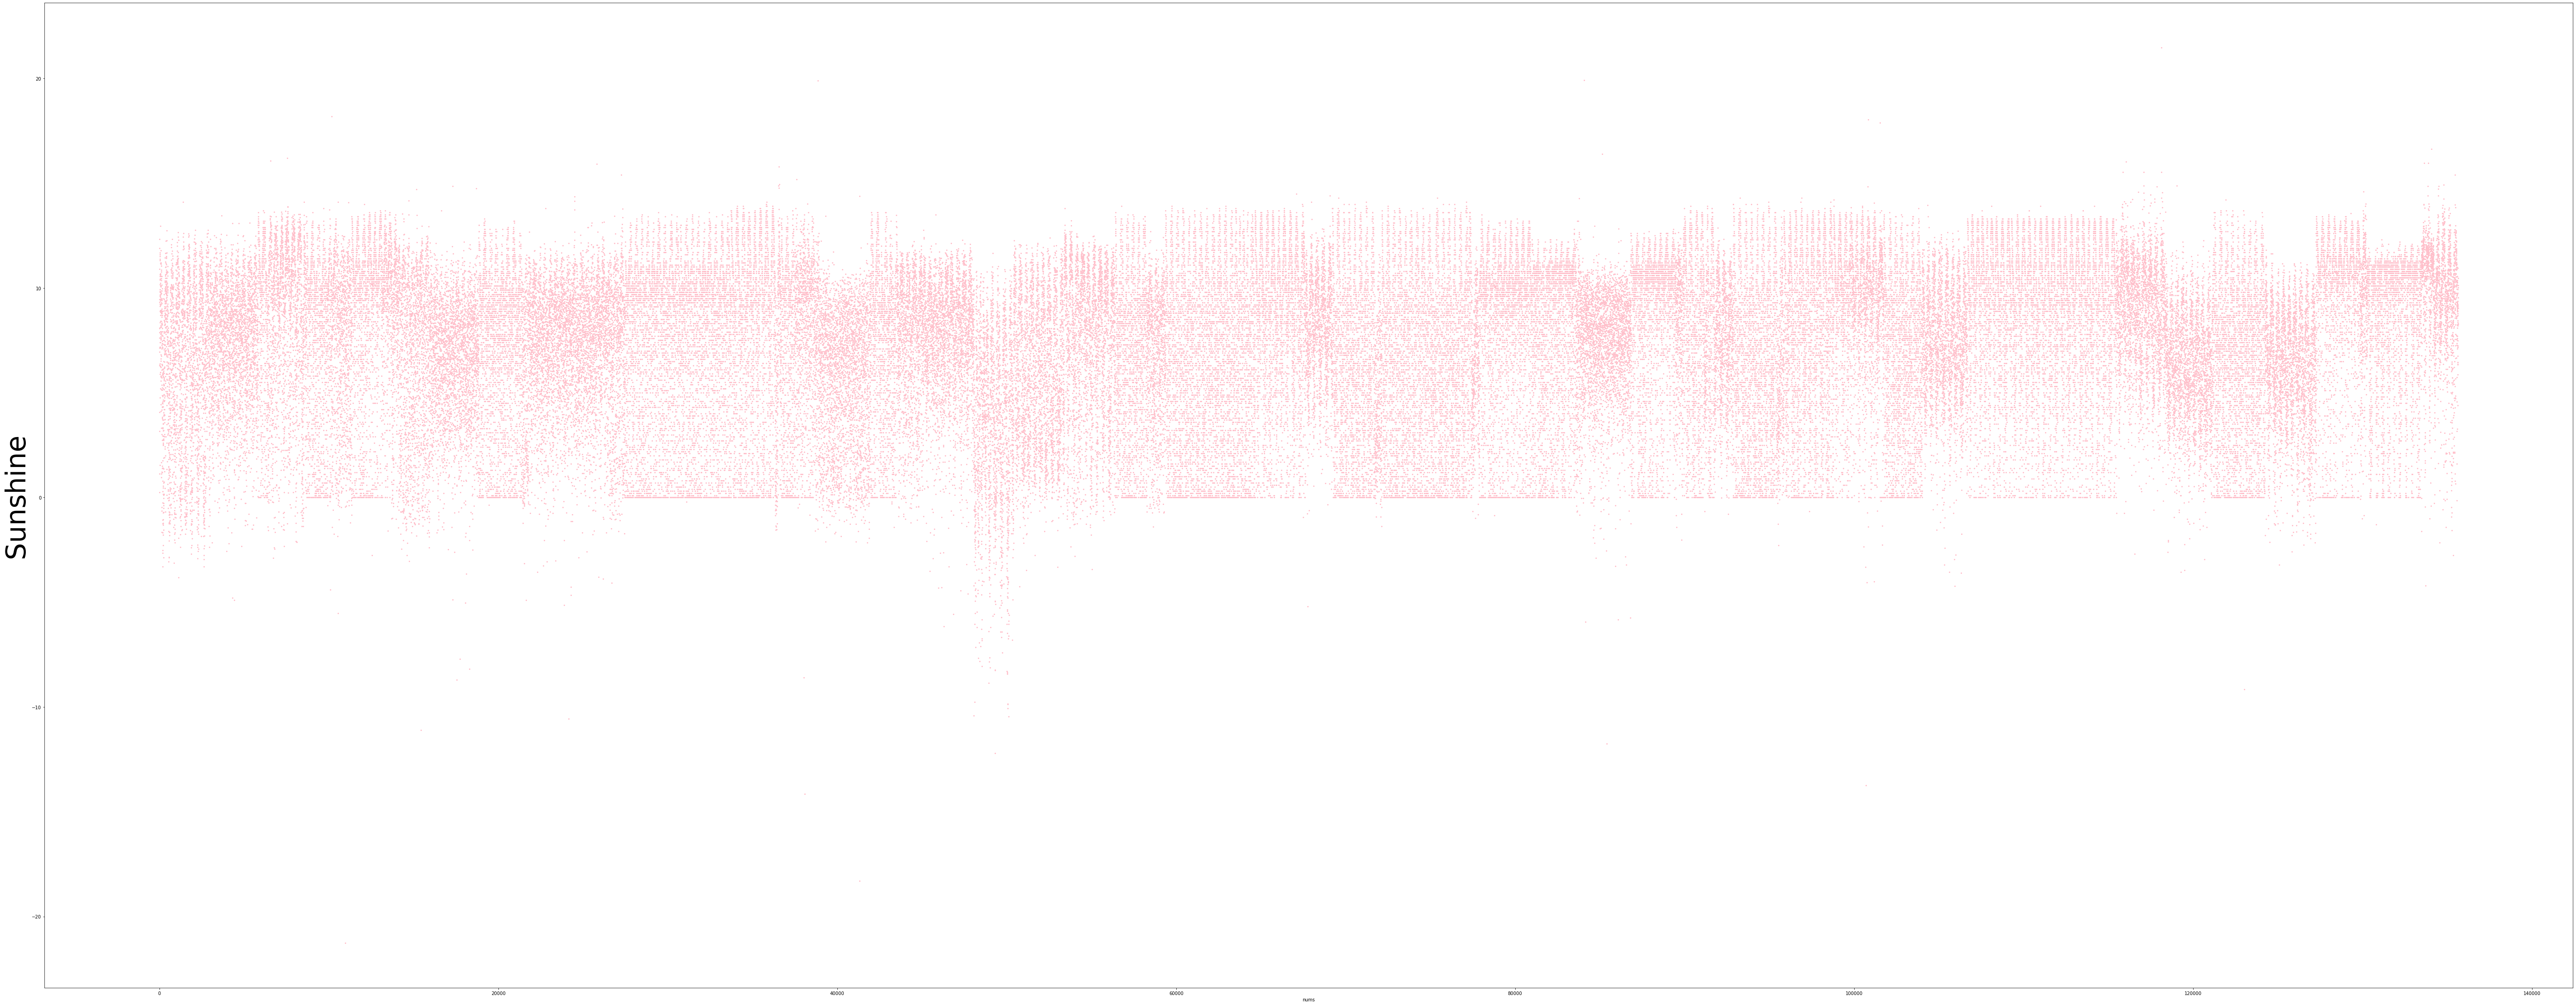

In [22]:
checklist = ['Sunshine']
for j in checklist:
    print("Mean: ", k[j].mean() , " Median: ", k[j].median())
    f = plt.figure()
    f.set_figwidth(100)
    f.set_figheight(40)
    ypoints = k[j]
    xpoints = np.arange(0,len(k[j]),1)
    meanpoint = np.linspace(k[j].mean(),k[j].mean(),len(xpoints))
    modepoint = np.linspace(k[j].mode(),k[j].mode(),len(xpoints))
    medianpoint= np.linspace(k[j].median(),k[j].median(),len(xpoints))
    # plt.plot(xpoints, meanpoint, linewidth=7.0)
    # plt.plot(xpoints, modepoint, linewidth=7.0)
    # plt.plot(xpoints, medianpoint, linewidth=7.0)
    # plt.legend(["mean", "Mode" , "Median", "data"],fontsize=40)
    plt.plot(xpoints, ypoints , 'o', markersize = 2 , color = 'Pink')
    plt.xlabel('nums')
    plt.ylabel(j , fontsize=60)
    # plt.savefig(j+'.jpeg')
    plt.show()

In [23]:
k_enan = k.dropna()
# k_enan
# x = k_enan[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow']]
x = k_enan.drop(columns=categoricals)
x = x.drop(columns=['AvgPressure'])
y = k_enan['AvgPressure']
X = x.values
Y = y.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2 , random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, y_train.shape)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
 
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# examining model precision (RMSE)
print(X_test_poly)
print(X_test_poly.shape, X_test.shape)

y_predicted = lin2.predict(X_test_poly)
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print(r2_score(y_test, y_predicted))

(99303, 16) (99303,)
[[ 1.         -1.25603475  1.23230674 ...  0.0198447   0.24664118
   3.06539595]
 [ 1.         -1.08012088 -1.10805827 ... -0.02153214 -0.02101812
  -0.02051638]
 [ 1.          0.6049815  -0.96573878 ... -0.28273047 -0.0761617
  -0.02051638]
 ...
 [ 1.          1.73387878 -1.42432381 ... -0.05676183  0.03412546
  -0.02051638]
 [ 1.         -1.45872713 -1.21875121 ... -0.0101083  -0.01440089
  -0.02051638]
 [ 1.         -0.1967668  -0.72853962 ... -0.2746015  -0.07505883
  -0.02051638]]
(24826, 969) (24826, 16)
0.4712975689053557


In [24]:
k_enan = k[k['AvgPressure'].isna()]
x = k_enan.drop(columns=categoricals)
x = x.drop(columns=['AvgPressure'])
y = k_enan['AvgPressure']
X = x.values
Y = y.values
X_test = X
X_test = scaler.transform(X_test)

# Fitting Polynomial Regression to the dataset
 
poly = PolynomialFeatures(degree = 3)
X_test_poly = poly.fit_transform(X_test)

# examining model precision (RMSE)
print(X_test_poly)
print(X_test_poly.shape, X_test.shape)

y_predicted = lin2.predict(X_test_poly)
print(len(y_predicted))

[[ 1.         -1.64140691 -2.16754784 ... -0.25092605 -0.07175022
  -0.02051638]
 [ 1.         -1.64138099 -1.5033902  ... -0.44932744 -0.09601339
  -0.02051638]
 [ 1.         -1.64135506 -1.51920348 ... -0.290978   -0.07726458
  -0.02051638]
 ...
 [ 1.          1.52416125 -1.21875121 ...  1.48190587 -0.8022445
   0.43430304]
 [ 1.          1.52418717 -2.04104162 ... -0.7051173  -0.12027657
  -0.02051638]
 [ 1.          1.52421309 -1.67733625 ... -0.53570195 -0.10483637
  -0.02051638]]
(11514, 969) (11514, 16)
11514


In [25]:
k.reset_index(drop=True, inplace=True)

cnt = 0
for i,v in enumerate(k['AvgPressure'].tolist()):
    if math.isnan(v):
        # print(i, ': ' ,k['Cloud9am'][i])
        k['AvgPressure'][i] = y_predicted[cnt]
        cnt += 1
print(k.isna().sum())

C:\Users\Asus\AppData\Local\Temp\ipykernel_22208\1298942525.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k['AvgPressure'][i] = y_predicted[cnt]


Unnamed: 0       0
Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
AvgPressure      0
dtype: int64


In [26]:
k.to_csv('out3.csv')

Mean:  1016.4711362410268  Median:  1016.45


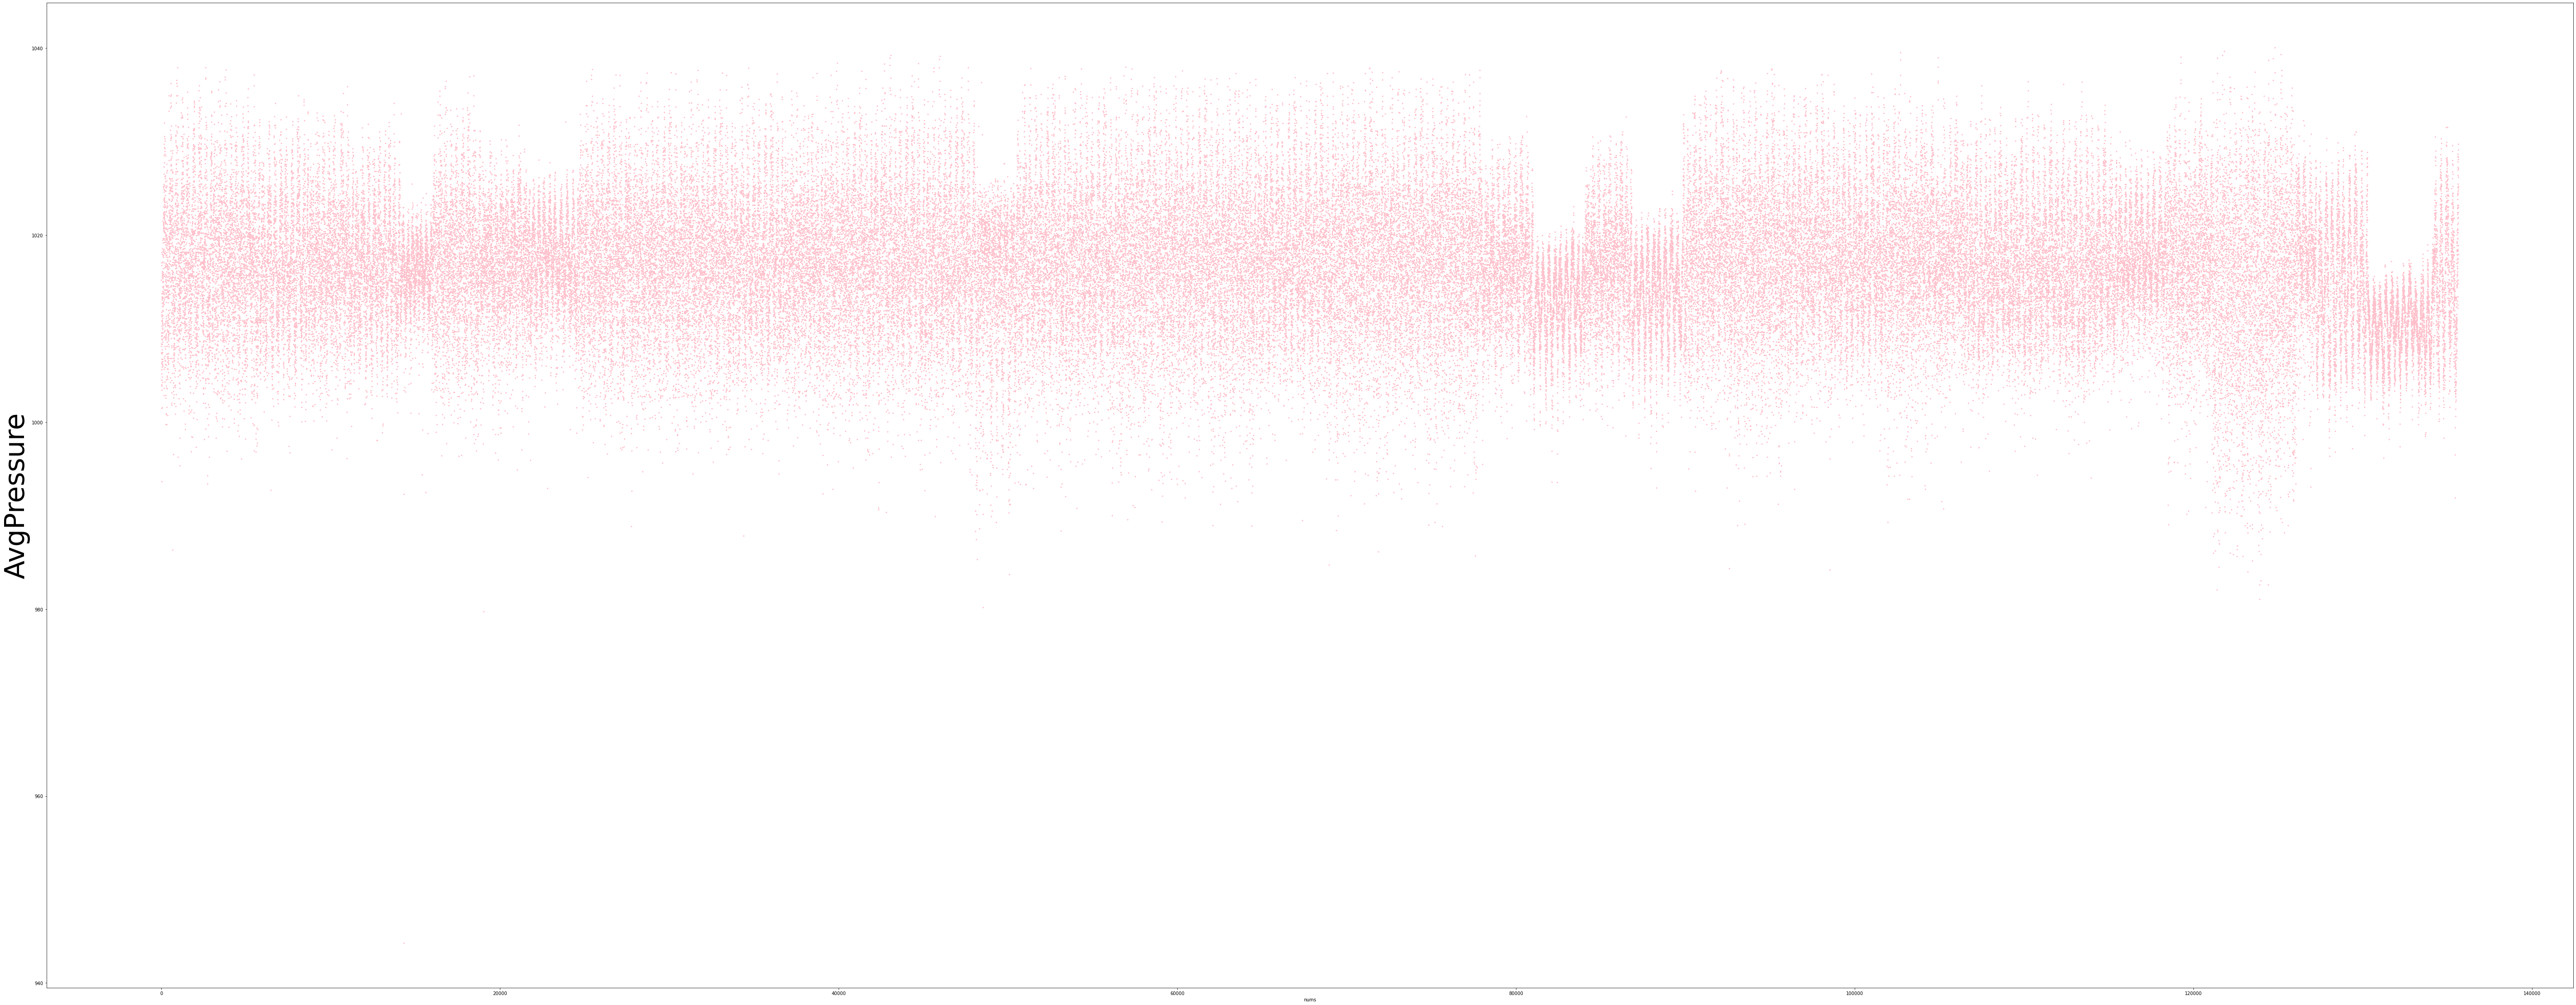

In [28]:
checklist = ['AvgPressure']
for j in checklist:
    print("Mean: ", k[j].mean() , " Median: ", k[j].median())
    f = plt.figure()
    f.set_figwidth(100)
    f.set_figheight(40)
    ypoints = k[j]
    xpoints = np.arange(0,len(k[j]),1)
    meanpoint = np.linspace(k[j].mean(),k[j].mean(),len(xpoints))
    modepoint = np.linspace(k[j].mode(),k[j].mode(),len(xpoints))
    medianpoint= np.linspace(k[j].median(),k[j].median(),len(xpoints))
    # plt.plot(xpoints, meanpoint, linewidth=7.0)
    # plt.plot(xpoints, modepoint, linewidth=7.0)
    # plt.plot(xpoints, medianpoint, linewidth=7.0)
    # plt.legend(["mean", "Mode" , "Median", "data"],fontsize=40)
    plt.plot(xpoints, ypoints , 'o', markersize = 2 , color = 'Pink')
    plt.xlabel('nums')
    plt.ylabel(j , fontsize=60)
    # plt.savefig(j+'.jpeg')
    plt.show()